# Reservoir Characterization Workflow Part 3: 

## We have used the new hierarchical carbonate reservoir benchmarking case study created by Costa Gomes J, Geiger S, Arnold D to be used for reservoir characterization, uncertainty quantification and history matching(1)

**This Jupyter Notebook presents the Python Code and Documentation for a typical Carbonate Reservoir Characterization Workflow including the calculations of Chartbook Porosity, Lithology using Scipy Optimization and kNN estimations for Permeability and Thomeer Capillary Pressure (Pc) Parameters. The last step is to calculate Pc-based Bulk Volume Oil (BVO) based on the height above the Free Water Level (FWL) and formation fluid density differences to account for buoyancy. Accurate BVO is the results of level-by-level changes in the Thomeer parameters and Capillary Pressure curves at each level:**

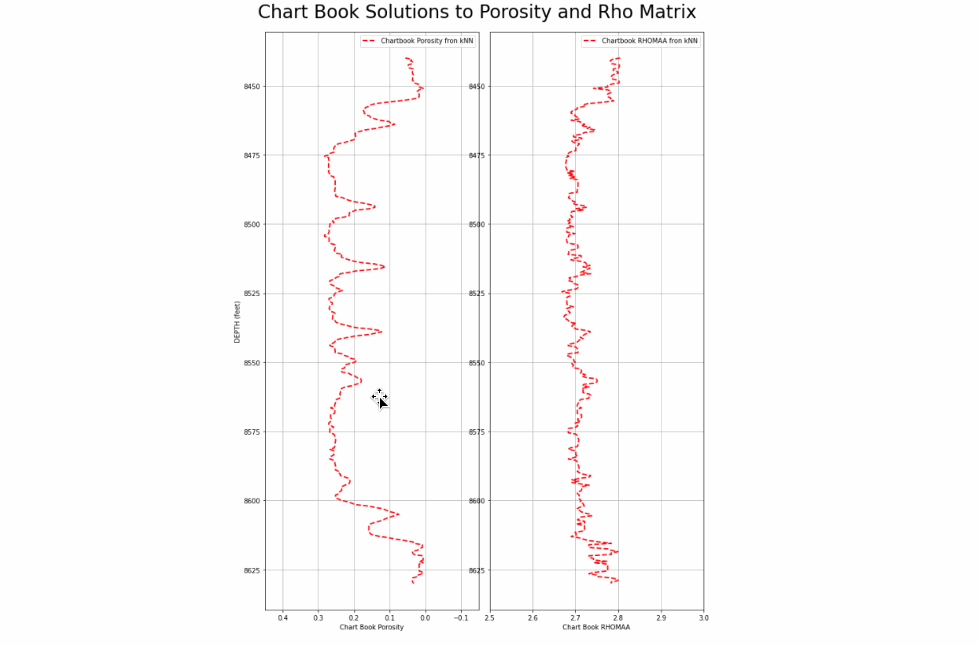

### Constructive criticism and any collaboration are both welcome. 



---
---
# Costa's Carbonate Reservoir Characterization Workflow being used in this Notebook:

In this GitHub repository we have used a new, comprehensive reservoir characterization database from Costa, Geiger and Arnold(1) We employed all the available well logs, Routine Core Analysis (RCA) and Special Core Analysis (SCAL and implemented our normal carbonate reservoir characterization workflow as discussed by Phillips (2). For this repository we did not use the 3D static or dynamic models, but we did use the time-series dynamic production and formation pressure data by well in Spotfire to better understand the dynamic aspects of the reservoir too. This is a rich dataset that needs to be explored further, more than what is presented in the scope of this project. 

The RCA and SCAL core data as well as the 17 well logs provided as las files were used extensively in our Petrophysical evaluation. These data are all in a Geolog project that is included in this repository. The following layout depth plot display shows a typical well from the field and the analysis performed on each well. 

![Geolog_Image](Results.png)

The process used in this repository follows a tried and proven workflow as described by Phillips et al. (2) in the characterization of an Arab D carbonate reservoirs from Saudi Arabia. Core Porosity, Permeability, Petrophysical Rock Types (PRT), Capillary Pressure and capillary pressure-based saturations are all estimated or calculated within this workflow. Just as in previous studies, the core analysis database was used extensively as the foundation and calibration to these petrophysical interpretations. 

Costa provided 110 High Pressure Mercury Injection (HPMI) core samples with RCA Porosity and Permeability. We performed Thomeer Parameter Analysis on each HPMI sample to establish our own, reservoir specific Thomeer Parameter Capillary Pressure core database used to mode saturations. In Geolog we fit the Thomeer hyperbola to all 110 HPMI samples and established the Thomeer parameters for each sample. We used python loglan code to load the High-Pressure Mercury Injection (HPMI) Core data directly from the Costa SCAL dataset into a Geolog Well and then modeled the HPMI data using the Thomeer parameters fitting the Thomeer hyperbola to each HPMI sample. This portion of the Geolog project serves an example as to how to build your own reservoir-specific core calibration database for their own Reservoir Characterization studies. 

![Geolog_Image]( Thomeer_Parameter_fitting.gif)

### Suggested Carbonate Workflow:
The following workflow and processing are suggested to interrogate, process, interpret and model the petrophysical properties for this benchmark carbonate reservoir using Costa's RCA and High-Pressure Mercury Injection core database as calibration. The workflow consists of the following steps:

1) Interrogate the Well Log data and Costa calibration data using standard Geolog layouts, cross plots, and histograms; and then use a python loglan featuring Altair, which is interactive software driven from a Geolog Module Launcher.

##### Altair used to Interrogate the Costa Capillary Pressure curves and Petrophysical Rock Types (PRTs):

![Geolog_Image](Costa_Pc2.gif)

2) Normally we would run MultiMin for a solid log analysis model using the typical minerals found in this reservoir; Limestone, Dolomite, and Illite. With MultiMin we always use environmentally corrected log data, calculating the uncertainties for each log curve employed in the analysis. However, to make this dataset more universal, we have employed python to perform our deterministic log analysis of the 17 HW wells. This code is provided in the Geolog project. We received these data as las files with a text file of log header data including X,Y locations, KB elevation and TD.  There were no directional survey data provided, so at this point we are assuming these wells to be vertical, and TVDss was calculated accordingly. 

3) Use available core data from the representative reservoir/field to build a petrophysical model to estimate permeability for all wells in field using Geolog's Facimage. Our plan is to include a python loglan too using kNN with normalized input data that is weighted by Euclidean distances for each of the nearest neighbors to estimate permeability for each well. 

4) Using the kNN estimated permeability and calculated Total Porosity (PHIT) from our log analysis, we queried Costa's core database to predict the following Petrophysical results:

- Thomeer Capillary Pressure parameters (Pdi, Gi and BVocci) for each pore system, i, over the entire reservoir interval for Capillary Pressure-based saturations
- Estimate the most dominant pore throat diameter at each level in the well calculated from the Thomeer parameters G and Pd. This exact mode of the pore throat distribution is calculated using the following equation:

	 	*Mode of Pore Throat Distribution (microns) = exp(-1.15 * G1) * (214/Pd1)*

This exact Mode of the Pore Throat Distribution (PTD) is what Winland is trying to accomplish with r35 and Amaefule with FZI; however, they are not exact. The Mode of the PTD calculated from the Buiting equation is taken directly from the Capillary Pressure data and is the exact mode that correlates to other petrophysical parameters extremely well. 

We used this mode to partition our data into Petrophysical Rock Types. If the Mode > 2 microns, then the PRT was a Macro porous rock. If the Mode > 0.1 micron and less that 2 microns, then this was Meso porous rock. If the Mode < 0.1 microns, then this rock was Micro porous rock.


5) Use the Thomeer Capillary Pressure parameters to model saturations based on the buoyancy due to fluid density differences at the height above the Free Water Level (FWL). In this instance we compare the Bulk Volume Oil (BVO) from our analysis vs. BVO from Thomeer-based capillary pressure saturations. We have used BVO since BVO is pore volume weighted, and Sw is not.

We did perform a Free Water Level (FWL) search for each well. We use the Thomeer parameters to model Capillary Pressure based saturations as shown below:

![Geolog_Image](Thomeer_sats.png)

We vary the FWL from the highest potential FWL elevation down to the lowest potential FWL elevation for the reservoir and pick the FWL where the error between the BVO on logs vs. Capillary Pressure are at a minimum. 

![Geolog_Image](fwl_search.gif)

This is an example of the single well output from a typical FWL search. The FWL search was performed on all wells in the study.

![Geolog_Image](FWLSearch.png)

Not all wells are useful in establishing the FWL. A few of the wells were too high where all we really were estimating was the Base of Reservoir (BOR) for those wells. There were also a few wells that were near 100% wet, and they were not used to establish the FWL surface. Eliminating these wells allowed us to establish the following FWL surface for this reservoir:

![Geolog_Image](FWL_Surface.png)

Our estimated FWL surface is a plane but tilted with a high of 8178 feet TVDss on the West dipping to the East to a maximum FWL elevation of 8214 feet TVDss. Tilted FWL’s are quite prevalent in Saudi Arabia due to dynamic aquifer pressures, tilted structures and even subduction. This FWL Surface was then used with the estimated Thomeer parameters on each well to calculate the final Capillary Pressure based saturations for each well. 



---
### RESOURCES:
https://researchportal.hw.ac.uk/en/datasets/costa-model-hierarchical-carbonate-reservoir-benchmarking-case-st

https://github.com/Philliec459/Geolog-Used-to-Model-Thomeer-Parameters-from-High-Pressure-Mercury-Injection-Data

https://github.com/Philliec459/Geolog-Used-to-Automate-the-Characterization-Workflow-using-Clerkes-Rosetta-Stone-calibration-data

### REFERENCES:
1.  Costa Gomes J, Geiger S, Arnold D. The Design of an Open-Source Carbonate Reservoir Model. Petroleum Geoscience, 
    https://doi.org/10.1144/petgeo2021-067
2.  Phillips, E. C., Buiting, J. M., Clerke, E. A, “Full Pore System Petrophysical Characterization Technology for Complex Carbonate Reservoirs – Results from Saudi Arabia”, AAPG, 2009 Extended Abstract.
3.  Clerke, E. A., Mueller III, H. W., Phillips, E. C., Eyvazzadeh, R. Y., Jones, D. H., Ramamoorthy, R., Srivastava, A., (2008) “Application of Thomeer Hyperbolas to decode the pore systems, facies and reservoir properties of the Upper Jurassic Arab D Limestone, Ghawar field, Saudi Arabia: A Rosetta Stone approach”, GeoArabia, Vol. 13, No. 4, p. 113-160, October 2008. 
 

 
# The following is a summary of the workflow process:

# Code:

## Load dependencies:

The following section loads all of the Python libraries used in this notebook.

In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a script file.
"""
import math
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import lasio

%matplotlib inline

# Chart Book Neutron/Density Porosity using kNN and then Scipy Optimization used to Estimate Lithology:

### The objective of this portion of the project is to calculate a Neutron log vs. Bulk Density log Cross-Plot Total porosity using the Schlumberger CNL or TNPH Charts as shown below. It is important to use the proper Neutron chart for either fresh or saline fluid densities as specified. The Neutron logs should also be on limestone matrix units with these charts. 

![CNL_Image](CNL.png)

![TNPH_Image](TNPH.png)

###  This program uses as training data Neutron Porosity (V/V) vs. Bulk Density (G/CC) with porosities taken from the actual charts). The chartbook porosity estimations are made using kNN. We normalize the Neutron porosity and Bulk Density curves before making any Euclidian distance calculations, and then use a kNN of 3 to estimate the Cross-Plot porosity values from our data set.   

![SMatrixCNL_Image](Matrix_CNL2.png)

![Matrix_TNPH.png](Matrix_TNPH.png)

### This program has been tested for the charts available showing good agreement with the training data for the calculated porosities. Further testing is recommended before using this program to better understand the uncertainties in the estimations and validate using a KNN of 3. 

### We have 4 sets of chart files representing 4 of the Schlumberger charts: 2 fluid densities for CNL and 2 for TNPH. Other vendor charts will also be included as needed in the future. 

In [2]:
"""
# =============================================================================
# # ======================================================================= # #
# # # 
# # #      Read in Digitized Chartbook data stored in Excel spreadsheet   # # #
# # #
# # ======================================================================= # #
# =============================================================================
"""


#select the proper Neutron-Denisity Chartbook file
''' 
    Schlumberger CNL Neutron Log at different Fluid Densities
'''
#file = r'./data/CNL_1pt0.xlsx'
file = r'./data/CNL_1pt1.xlsx'
''' 
    Schlumberger TNPH Neutron Log at different Fluid Densities
'''
#file = r'./data/TNPH_1pt0.xlsx'
#file = r'./data/TNPH_1pt19.xlsx'



df_chart = pd.read_excel(file,index_col=False)



CNL_chart  = df_chart['Neutron']
RHOB_chart = df_chart['RHOB']
Rho_Matrix_chart  = df_chart['Rho_Matrix']
Porosity_chart = df_chart['Porosity']     


#Fluid Density
FD = 1.19

### Cross Plot data with Porosity or Rho Matrix on Color axis:

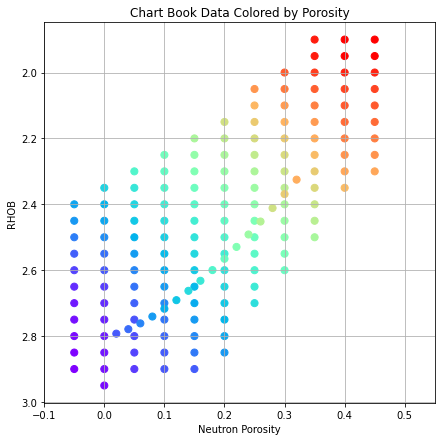

In [3]:
plt.figure(figsize=(7,7))    
#plt.scatter(CNL_chart, RHOB_chart, c=Porosity_chart,cmap="RdYlGn",)
#plt.scatter(CNL_chart, RHOB_chart, s=50, c=Porosity_chart)
#plt.scatter(CNL_chart, RHOB_chart, c=Porosity_chart,cmap="RdYlGn")
plt.scatter(CNL_chart, RHOB_chart, s=50, c = Porosity_chart, cmap = "rainbow")
plt.xlim(-0.1, 0.55)
plt.gca().invert_yaxis()
plt.title("Chart Book Data Colored by Porosity")
plt.ylabel('RHOB')
plt.xlabel('Neutron Porosity')
plt.grid(True)
plt.show()

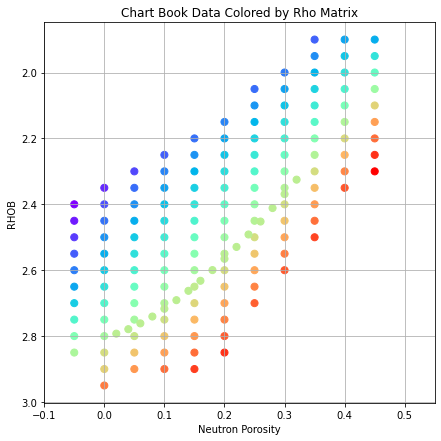

In [4]:
plt.figure(figsize=(7,7))    
#plt.scatter(CNL_chart, RHOB_chart, c=Porosity_chart,cmap="RdYlGn",)
#plt.scatter(CNL_chart, RHOB_chart, s=50, c=Porosity_chart)
#plt.scatter(CNL_chart, RHOB_chart, c=Porosity_chart,cmap="RdYlGn")
plt.scatter(CNL_chart, RHOB_chart, s=50, c = Rho_Matrix_chart, cmap = "rainbow")
plt.xlim(-0.1, 0.55)
plt.gca().invert_yaxis()
plt.title("Chart Book Data Colored by Rho Matrix")
plt.ylabel('RHOB')
plt.xlabel('Neutron Porosity')
plt.grid(True)
plt.show()

# Read In Well Log Data from las File using Lasio:

**The following section loads the Well Log Data using Lasio Created by Andy McDonald.** 
  
This portion of the notebook illustrates how to load data in from a LAS file and carry out a basic QC of the data before plotting it on a log plot.

In [5]:
#las = lasio.read("./data/HW-3.las");elev_meas_ref = 160
#las = lasio.read("./data/HW-4.las");elev_meas_ref = 29
#las = lasio.read("./data/HW-5.las");elev_meas_ref = 36
#las = lasio.read("./data/HW-6.las");elev_meas_ref = 49
#las = lasio.read("./data/HW-7.las");elev_meas_ref = 367
#las = lasio.read("./data/HW-8.las");elev_meas_ref = 416
#las = lasio.read("./data/HW-9.las");elev_meas_ref = 492
las = lasio.read("./data/HW-10.las");elev_meas_ref = 397
#las = lasio.read("./data/HW-24.las");elev_meas_ref = 426
#las = lasio.read("./data/HW-25.las");elev_meas_ref = 386
#las = lasio.read("./data/HW-26.las");elev_meas_ref = 375
#las = lasio.read("./data/HW-27.las");elev_meas_ref = 453
#las = lasio.read("./data/HW-28.las");elev_meas_ref = 430
#las = lasio.read("./data/HW-29.las");elev_meas_ref = 466
#las = lasio.read("./data/HW-30.las");elev_meas_ref = 590
#las = lasio.read("./data/HW-31.las");elev_meas_ref = 417
#las = lasio.read("./data/HW-32.las");elev_meas_ref = 441

In [6]:
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

 (STRT): 8150.0
 (STOP): 8630.0
 (STEP): 0.5
 (NULL): -999.25
COMPANY (COMP): 
WELL (WELL): HW-10
FIELD (FLD): COSTA
LOCATION (LOC): 
SERVICE COMPANY (SRVC): 
ss} (DATE): 2018-02-06 14:55:39   : Log Export Date {yyyy-MM-dd HH:mm
PROVINCE (PROV): 
UNIQUE WELL ID (UWI): HW-10
API NUMBER (API): 


In [7]:
for curve in las.curves:
    print(curve.mnemonic)

DEPT
GR
RHOB
NPHI
DT
PHIE
RT
SW
SO
CORE_POR
CORE_PERM


In [8]:
las.keys()

['DEPT',
 'GR',
 'RHOB',
 'NPHI',
 'DT',
 'PHIE',
 'RT',
 'SW',
 'SO',
 'CORE_POR',
 'CORE_PERM']

In [9]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, Units: ft, Description: DEPTH
Curve: GR, Units: gAPI, Description: GR
Curve: RHOB, Units: g/cm3, Description: RHOB
Curve: NPHI, Units: ft3/ft3, Description: NPHI
Curve: DT, Units: us/ft, Description: DT
Curve: PHIE, Units: ft3/ft3, Description: PHIE
Curve: RT, Units: ohm.m, Description: RT
Curve: SW, Units: , Description: SW
Curve: SO, Units: , Description: SO
Curve: CORE_POR, Units: ft3/ft3, Description: CORE_POR
Curve: CORE_PERM, Units: mD, Description: CORE_PERM
There are a total of: 11 curves present within this file


In [10]:
df_log = las.df()

In [11]:
df_log['GR']

DEPT
8440.0    31.66
8440.5    30.61
8441.0    29.37
8441.5    28.05
8442.0    27.10
          ...  
8628.0    23.40
8628.5    27.49
8629.0    32.21
8629.5    33.37
8630.0    29.32
Name: GR, Length: 381, dtype: float64

In [12]:
df_log.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
8440.0,31.66,2.73,0.07,NaN,0.0,17.62,NaN,NaN,NaN,NaN
8440.5,30.61,2.73,0.06,NaN,0.0,19.01,NaN,NaN,NaN,NaN
8441.0,29.37,2.72,0.06,NaN,0.0,20.33,NaN,NaN,NaN,NaN
8441.5,28.05,2.73,0.05,NaN,0.0,21.58,NaN,NaN,NaN,NaN
8442.0,27.10,2.73,0.05,NaN,0.0,22.79,NaN,NaN,NaN,NaN


In [13]:
df_log.describe()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
count,381.000000,381.000000,381.000000,0.0,381.000000,381.000000,160.000000,160.000000,311.000000,311.000000
mean,12.346719,2.410236,0.187402,NaN,0.182047,4.944278,0.669063,0.330937,23.070740,12.134534
std,6.704469,0.165094,0.079996,NaN,0.092130,9.043167,0.161995,0.161995,4.518222,33.281485
min,5.370000,2.250000,0.020000,NaN,0.000000,0.220000,0.380000,0.000000,8.710000,0.040000
25%,8.610000,2.290000,0.150000,NaN,0.140000,0.440000,0.540000,0.200000,21.075000,1.365000
50%,9.390000,2.330000,0.230000,NaN,0.230000,1.030000,0.670000,0.330000,24.830000,2.770000
75%,11.980000,2.480000,0.250000,NaN,0.250000,2.670000,0.800000,0.460000,26.325000,5.950000
max,33.940000,2.750000,0.270000,NaN,0.270000,38.180000,1.000000,0.620000,31.800000,345.340000


In [14]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 381 entries, 8440.0 to 8630.0
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GR         381 non-null    float64
 1   RHOB       381 non-null    float64
 2   NPHI       381 non-null    float64
 3   DT         0 non-null      float64
 4   PHIE       381 non-null    float64
 5   RT         381 non-null    float64
 6   SW         160 non-null    float64
 7   SO         160 non-null    float64
 8   CORE_POR   311 non-null    float64
 9   CORE_PERM  311 non-null    float64
dtypes: float64(10)
memory usage: 32.7 KB


# Visualising Data Extent (from Andy McDonald):

Instead of the summary provided by the pandas describe() function, we can create a visualisation using matplotlib. Firstly, we need to work out where we have nulls (nan values). We can do this by creating a second dataframe and calling .notnull() on our well dataframe.  
  
As this returns a boolean (True or False) for each depth, we need to multiply by 1 to convert the values from True and False to 1 and 0 respectively.

In [15]:
well_nan = df_log.notnull() * 1

In [16]:
well_nan.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
8440.0,1,1,1,0,1,1,0,0,0,0
8440.5,1,1,1,0,1,1,0,0,0,0
8441.0,1,1,1,0,1,1,0,0,0,0
8441.5,1,1,1,0,1,1,0,0,0,0
8442.0,1,1,1,0,1,1,0,0,0,0


We can now create a summary plot of the missing data.



HW-10


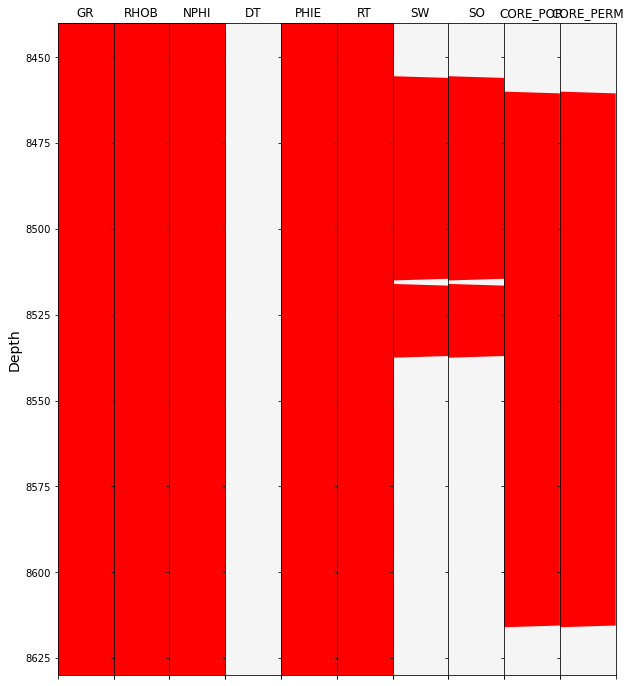

In [17]:
fig = plt.subplots(figsize=(10,12))
wellname=las.well.well.value
print()
print()
print(wellname)
#fig.suptitle('Data Extent: %s'%wellname, fontsize=24, color='blue')
#fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)



#Set up the plot axes
ax1 = plt.subplot2grid((1,10) , (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,10) , (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,10) , (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,10) , (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,10) , (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,10) , (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,10) , (0,6), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,10) , (0,7), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,10) , (0,8), rowspan=1, colspan = 1)
ax10 = plt.subplot2grid((1,10), (0,9), rowspan=1, colspan = 1)


columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    #ax.set_ylim(3000, 0)
    ax.set_ylim(max(las["DEPT"]),min(las["DEPT"]))
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)

plt.show()

In [18]:
for curve in las.curves:
    print(curve.mnemonic)

DEPT
GR
RHOB
NPHI
DT
PHIE
RT
SW
SO
CORE_POR
CORE_PERM


## Assign log curves from las file:

In [19]:
Dep = las['DEPT']
CNL  = las['NPHI']
RHOB = las['RHOB']
#RHOMAA = las['RHOMAA']
Porosity = las['PHIE']
gr       = las['GR']
ild      = las['RT']

### The following line converts RHOMAA to G/CM3 and might not be necessary on all wells:
The following line can be removed if not needed.

In [20]:
#for k in range(0,len(df_log) ,1):  
#    RHOMAA[k]=RHOMAA[k]/1000

In [21]:
#print(RHOMAA)

## 2a) kNN Used to estimate Cross Plot porosity and Rho Matrix from the appropriate chart:

In [22]:
"""
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            This is the beginnin of KNN estimating ND xplt Porosity 
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
"""  

#Fluid Density
FD = 1.1


deptharray = []
porarray   = []; #make list of 0 length
RHOMAA_array = []
Porosity_array = []
rhoarray = []


#log Data
for k in range(0,len(df_log) ,1):  

        cnl_norm  = (CNL[k]-(-0.05))/(0.6-(-0.05))
        rhob_norm = (RHOB[k]-1.9)/(3-1.9)
        


        dist_inv    = []
        dist_cnl    = []
        dist_rhob    = []
        inv_dist_array = []
        Por_weight = []
        Rhomatrix_weight =[]
        CNL_norm = []
        RHOB_norm = []

        dist_inv_total = 0
        Por_total     = 0



        #this is the chartbook_reference_data being used 
        for i in range(0,len(df_chart),1):
        
                CNL_norm.append((CNL_chart[i] - (-0.05)) / (0.6 - (-0.05)))
                RHOB_norm.append((RHOB_chart[i] - 1.9) / (3.0 - 1.9))
                
                #Euclidian Distance
                dist_cnl.append((abs(cnl_norm   - CNL_norm[i])))
                dist_rhob.append( abs(rhob_norm - RHOB_norm[i]))

                if math.sqrt(dist_cnl[i]**2 + dist_rhob[i]**2) > 0:
                    dist_inv.append( 1  /  math.sqrt( dist_cnl[i]**2 + dist_rhob[i]**2)  )
                else:
                    dist_inv.append( 1  /  math.sqrt( 0.0001 + dist_cnl[i]**2 + dist_rhob[i]**2)  )
        
                
                #calculalte weights
                Por_weight      .append(dist_inv[i] * Porosity_chart[i])
                Rhomatrix_weight.append(dist_inv[i] * Rho_Matrix_chart[i])
                
                
        
                inv_dist_array.append(dist_inv[i]);  # add items
        
        # =============================================================================
        ###                    KNN Array
        # # ===========================================================================
        # # #--------------------------------------------------------------------------
                distance_knn_array = [dist_inv, Por_weight, Rhomatrix_weight]
        #        distance_knn_array = [Permeability, Porosity, G1, PD1, BV1, G2, PD2, BV2]
        # # #--------------------------------------------------------------------------
        # # ===========================================================================
        # =============================================================================
        xnorm=np.array(CNL_norm)
        ynorm=np.array(RHOB_norm)
        
            
        #knn_array = np.transpose array
        knn_array = np.transpose(distance_knn_array)
        #print(knn_array)
        
        #Sort array from large to low by column 0 which is dist_inv 
        #xknn=np.array(knn_array)
        
        #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
        mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)
        #mat_sort = x[x[:,1].argsort()[::-1]]
        #mat_sort = x[x[:,2].argsort()[::-1]]
        
         
        #------------------------------------------------------------------------------
        #    Number of nearest Neighbors
        #------------------------------------------------------------------------------
        n_neighbors = 3
        #------------------------------------------------------------------------------
        
        dist_inv_total_knn = 0
        por_total_knn      = 0
        rhomatrix_total_knn      = 0
        
        
        
        #kNN Estimates for first 3 rows
        #dist_inv_total = mat_sort[0][0] + mat_sort[1][0] + mat_sort[2][0]
        for i in range(0,n_neighbors,1):
            dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
            por_total_knn  = por_total_knn + mat_sort[i][1]
            rhomatrix_total_knn  = rhomatrix_total_knn + mat_sort[i][2]
        
        
        #back to k values and calculate estimations now
        por_est_knn  = por_total_knn  / dist_inv_total_knn
        rhomatrix_est_knn  = rhomatrix_total_knn  / dist_inv_total_knn
        

#------------------------------------------------------------------------------ 
#            Write Data to arrays
#------------------------------------------------------------------------------
        deptharray.append(Dep[k]);          # Taken from logs
        porarray.append(por_est_knn);       # Calculated Chartbook Porosity 
        rhoarray.append(rhomatrix_est_knn); # Calculated Chartbook Rhomatrix


print(len(porarray))

381


## Depth Plot of  PHIT and RHOMAA from kNN Estimations using Chartbook data as calibration:

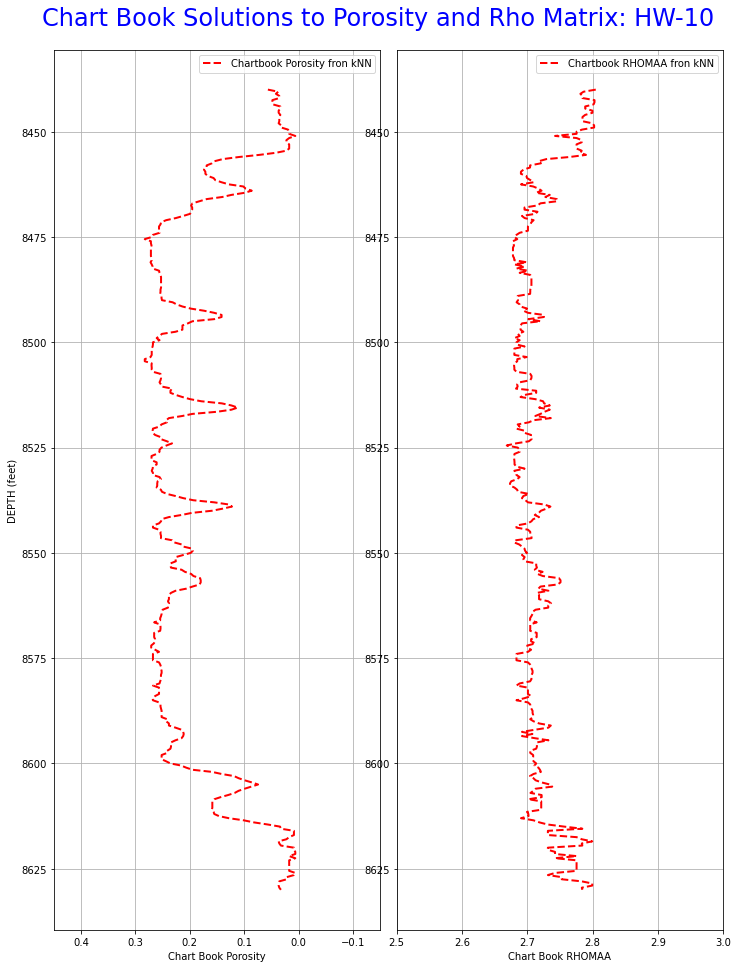

In [23]:
from matplotlib import gridspec

'''     
        deptharray.append(Dep[k]);          # Taken from logs
        porarray.append(por_est_knn);       # Calculated Chartbook Porosity 
        rhoarray.append(rhomatrix_est_knn); # Calculated Chartbook Rhomatrix
'''

y=np.array(deptharray)

fig = plt.figure(figsize=(12,15))
#fig.suptitle('Chart Book Solutions to Porosity and Rho Matrix',fontsize=28)
#fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.3)
wellname=las.well.well.value
fig.suptitle('Chart Book Solutions to Porosity and Rho Matrix: %s'%wellname, fontsize=24, color='blue')
fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)





gs = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])

# Porosity
ax1.plot(porarray, y,'--r',lw=2, label= 'Chartbook Porosity fron kNN')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_ylabel('DEPTH (feet)')
#ax11=ax1.twiny()
ax1.set_xlabel("Chart Book Porosity",color='black')
ax1.set_xlim(.45, -0.15)
ax1.legend()


# Rho Matrix
ax2.plot(rhoarray, y,'--r',lw=2, label= 'Chartbook RHOMAA fron kNN')                                                               
#ax2.plot(RHOMAA, y,'-b', lw=1, label= 'RHOMAA from MMin')
ax2.invert_yaxis()
ax2.grid(True)
ax2.set_xlabel("Chart Book RHOMAA",color='black')
ax2.set_xlim(2.5, 3)
ax2.legend()
#ax2.get_yaxis().set_visible(False)
#ax2=ax2.twiny()



# 2b) Optimizing Petrophysics solving for Lithology using Scipy Optimize: 

#### a) Set lith_option to be either Quartz-Calcite-Dolomite or Calcite-Dolomite
#### b) Illite Option: include Illite as Clay (illite_option = 'yes') or Clay-free (illite_option = 'no')

In [24]:
'''
# ==============================================================================
#  # ===========================================================================
#  # #--------------------------------------------------------------------------
# 
#      Lithology Option for either Calcite_Dolomite or Quartz_Calcite_Dolomite
#      
#        Also Illite Option ('yes' or 'no')
#
#        Don't forget the Electrical Properties too
# 
#  # #--------------------------------------------------------------------------
#  # ===========================================================================
# ==============================================================================
'''
lith_option =  'Calcite_Dolomite'    
#lith_option =  'Quartz_Calcite_Dolomite'     

illite_option = 'yes'
#illite_option = 'no'

# =================================================================================
#       Archie Saturation Constants
# =================================================================================
rw = 0.012 # Rw from Pickett Plot
m  = 2.0
n  = 2.0
# =================================================================================


## Scipy Optimization for Lithology:

In [25]:
import scipy.optimize as spo

'''
# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# ##
# ##            Start Code for Scipy Optimization using minimization
# ##
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
'''
VOL_QUARTZ = []
VOL_CALCITE = []
VOL_DOLO = []
porden =[]
VOL_ILLITE = []
tnph = []
bvw = []
bvo=[]
swt = []

rhob_theoretical = []
tnph_theoretical = []
error_opt        = []


'''
deptharray.append(Dep[k]);          # Taken from logs
RHOMAA_array.append(RHOMAA[k]);     # Taken from Log data
Porosity_array.append(Porosity[k]); # Taken from log data
porarray.append(por_est_knn);       # Calculated from logs 
rhoarray.append(rhomatrix_est_knn); # Calculated from logs
'''
    
#log Data
for k in range(0,len(df_log) ,1):  

    TNPH    = CNL[k]
    RHOB2   = RHOB[k]
    GR      = gr[k]
    ILD     = ild[k]
    PHIT    = porarray[k]
    RHOMAA2 = rhoarray[k]

    PORDEN  = (RHOMAA2 - RHOB2)/(RHOMAA2 - FD)

    # =================================================================================
    #       Saturation Calculations
    # =================================================================================
    BVW = PHIT*((1/PHIT**m) * (rw/ILD) )**(1/n)

    if BVW > PHIT:
        BVW=PHIT
    else:
        BVW=BVW

    Swt = BVW/PHIT
    BVO = (PHIT*(1-Swt))
    bvo.append(BVO)
    swt.append(Swt)    
    bvw.append(BVW)    
    
    # =================================================================================
    #       Illite Option Calculations
    # =================================================================================
    if illite_option == 'yes':
        vol_illite = -0.0424035 + 0.00562239*GR
        illite     = vol_illite/(1-PHIT)
    else:
        vol_illite = 0
        illite     = 0

        
    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # ##
    # ##         Scipy Optimization for Lithology of Calcite and Dolomite
    # ##
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    if lith_option == 'Calcite_Dolomite' :   
        
        # Function to mimimize (-area is to maximize)
        def f(xy):
            x  = xy[0]
            y  = xy[1]
            unity = illite + x + y - 1
            return unity  # -area to maximize

        # Start Guess for x and y [x guess, y guess]
        xy_start = [0.5, 0.5]

        # Bounds x is 0 to 1 and y is 0 to 1
        bnds = ((0, 1.0),(0, 1.0))

        # However if y wide can only be 30' wide then:
        #bnds = ((1, 100),(1, 30))

        # Constraints where lambda is all on one side and not: 2*xy[0] + xy[1] = 100 because of 'eq'
        cons = ({'type':'eq','fun':lambda xy: (((2.52*illite + 2.71*xy[0] + 2.847 *xy[1])*(1-PHIT) +  FD*PHIT)  - RHOB2)},
                {'type':'eq','fun':lambda xy: ((illite       +      xy[0] +        xy[1]) -1)                             }
                #{'type':'eq','fun':lambda xy: ( ( 0 *xy[0]*(1-PHIT)  + 0.05375*xy[1]*(1-PHIT)+      PHIT)   - TNPH)},
               )

        # Optimizing minimize
        result = spo.minimize(f, xy_start, options={"disp":False}, constraints = cons, bounds = bnds)
        xy   = result.x
        x    = xy[0]
        y    = xy[1]

  
        VOL_ILLITE.append(vol_illite)             
        VOL_QUARTZ.append(0)
        VOL_CALCITE.append(x*(1-PHIT))
        VOL_DOLO.append(y*(1-PHIT))

        rhob_theoretical.append(( 2.52*illite  + 2.71*x   +   2.847*y)*(1-PHIT) + FD*PHIT)
        tnph_theoretical.append((0.247*illite  +  0*x     +   0.006*y)*(1-PHIT) +    PHIT)

        #print('Theoretical RHOB =' , round(rhob_theoretical, 3)  , ', RHOB =',RHOB2)                     

        
    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # ##
    # ##       Scipy Optimization for Lithology of Quartz, Cakcite and Dolomite
    # ##
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================    
    elif lith_option == 'Quartz_Calcite_Dolomite' :      
        if RHOMAA2 > 2.0:
            # Function to mimimize (-area is to maximize)
            def f(xy):
                x  = xy[0]
                y  = xy[1]
                z  = xy[2]
                unity = illite + x + y + z - 1
                return unity  # -area to maximize

            # Start Guess for x and y [x guess, y guess]
            xy_start = [0.0, 0.0, 0.0]

            # Bounds x is 0 to 1 and y is 0 to 1
            bnds = ((0, 1.0),(0, 1.0),(0, 1.0))

            # However if y wide can only be 30' wide then:
            #bnds = ((1, 100),(1, 30))

            # Constraints where lambda is all on one side and not: 2*xy[0] + xy[1] = 100 because of 'eq'
            cons = ({'type':'eq','fun':lambda xy:(((2.52*illite + 2.65*xy[0]+2.71*xy[1] + 2.847*xy[2])*(1-PHIT) + 1.19*PHIT)-RHOB2)},
                    {'type':'eq','fun':lambda xy:((illite       +      xy[0]+     xy[1] +       xy[2])      -1)                    },
                    #{'type':'eq','fun':lambda xy:(( (-0.05*xy[0]+  0*xy[1]+0.05375*xy[2])*(1-PHIT) +      PHIT)-TNPH)},
                   )

            # Optimizing minimize
            result = spo.minimize(f, xy_start, options={"disp":False}, constraints = cons, bounds = bnds)
            xy = result.x
            x    = xy[0]
            y    = xy[1]
            z    = xy[2]
    
       
            VOL_ILLITE.append(vol_illite)
            VOL_QUARTZ.append(x*(1-PHIT))
            VOL_CALCITE.append(y*(1-PHIT))
            VOL_DOLO.append(z*(1-PHIT))
                      
            rhob_theoretical.append((2.520*illite + 2.65*x + 2.71*y + 2.847*z)*(1-PHIT) + FD*PHIT)
            tnph_theoretical.append((0.247*illite - 0.05*x + 0.0*y  + 0.006*z)*(1-PHIT) + PHIT)

            #print('Theoretical RHOB =' , round(rhob_theoretical, 3)  , ', RHOB =',RHOB2)                     
            
            
            
        else:

            VOL_ILLITE.append(vol_illite)
            VOL_QUARTZ.append(1-PHIT)
            VOL_CALCITE.append(0)
            VOL_DOLO.append(0)
            
            rhob_theoretical.append(0)
            tnph_theoretical.append(0)
            error.append(0)       

                       
    porden.append(PORDEN)   
    tnph.append(TNPH)
               
    rhob_norm = (RHOB[k]-1.9)/(3.0-1.9)
    rhob_norm_theo = (rhob_theoretical[k] -1.9)/(3.0-1.9)
    tnph_norm = ( CNL[k] - (-0.05)/(0.6-(-0.05)))
    tnph_norm_theo = (tnph_theoretical[k] -(-0.05))/(0.6-(-0.05))     

    error_opt.append(0.5*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo))/(PHIT))


## Optimization Petrophysical Results Depth Plot:

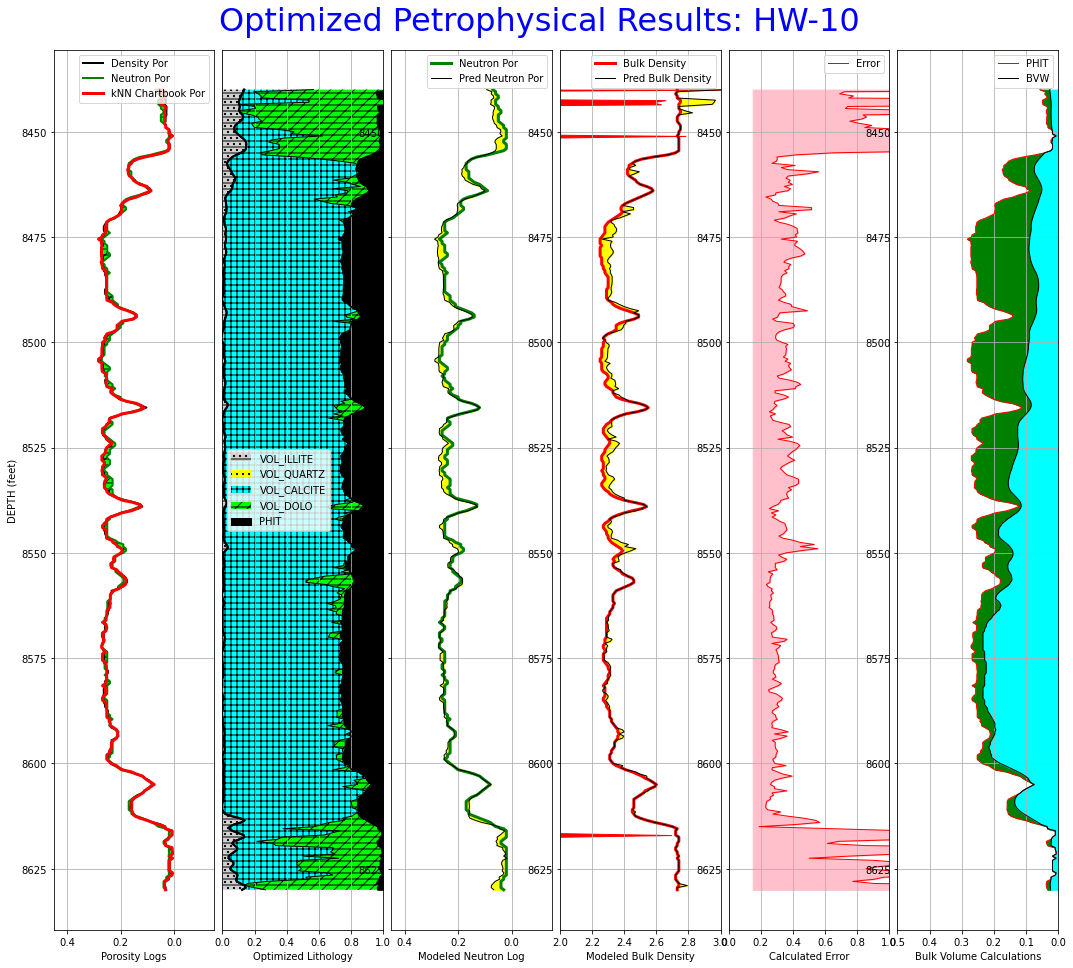

In [26]:
fig = plt.figure(figsize=(18,15))
#fig.suptitle('Optimized Petrophysical Results',fontsize=32,color='blue')
#fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)
wellname=las.well.well.value
fig.suptitle('Optimized Petrophysical Results: %s'%wellname, fontsize=32, color='blue')
fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)




gs = gridspec.GridSpec(1, 6)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[0,3])
ax5 = fig.add_subplot(gs[0,4])
ax6 = fig.add_subplot(gs[0,5])


y=np.array(deptharray)


# Porosity Logs
ax1.plot(porden, y,'-k',lw=2, label= 'Density Por')
ax1.plot(CNL, y,'-g', lw=2, label= 'Neutron Por')
ax1.plot(porarray, y,'-r',lw=3, label= 'kNN Chartbook Por')
ax1.set_xlabel("Porosity Logs",color='black')
ax1.set_ylabel('DEPTH (feet)')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_xlim(.45, -0.15)
ax1.fill_betweenx(y,CNL,porden, facecolor='#00ff00', hatch='--//')#, label= 'VOL_DOLO')
ax1.legend()



# Lithology
quartz=np.array(VOL_QUARTZ)
calcite=np.array(VOL_CALCITE)
dolo=np.array(VOL_DOLO)
illite=np.array(VOL_ILLITE)



ax2.plot(illite, y,'-k',lw=2)
ax2.plot(illite+quartz, y,'-k',lw=2)
ax2.plot(illite+quartz+calcite, y,'-k',lw=1)
ax2.plot(illite+quartz+calcite+dolo, y,'-k')
ax2.set_xlim(0, 1)
ax2.set_xlabel(('Optimized Lithology'), color='black')
ax2.fill_betweenx(y,0,illite, facecolor='#d1d1d1' ,hatch='.-.-',label= 'VOL_ILLITE')
ax2.fill_betweenx(y,illite,illite+quartz, facecolor='#ffff00' ,hatch='..',label= 'VOL_QUARTZ')
ax2.fill_betweenx(y,illite+quartz,illite+quartz+calcite, facecolor='#00ffff' ,hatch='++',label= 'VOL_CALCITE')
ax2.fill_betweenx(y,illite+quartz+calcite,illite+quartz+calcite+dolo, facecolor='#00ff00', hatch='--//', label= 'VOL_DOLO')
ax2.fill_betweenx(y,illite+quartz+calcite+dolo,1,color='black', label= 'PHIT')
ax2.legend()
#ax2=ax[2].twiny()
ax2.invert_yaxis()
ax2.grid(True)
#ax2.set_ylabel('DEPTH (feet)')
ax2.get_yaxis().set_visible(False)


# Modeled Neutron Log
ax3.plot(CNL, y,'-g', lw=3, label= 'Neutron Por')
ax3.plot(tnph_theoretical, y,'-k',lw=1, label= 'Pred Neutron Por')
ax3.set_xlabel("Modeled Neutron Log",color='black')
ax3.set_xlim(.45, -0.15)
ax3.fill_betweenx(y,CNL,tnph_theoretical, color='yellow')#, label= 'VOL_DOLO')
#ax3.get_yaxis().set_visible(False)
ax3.legend()
ax3.invert_yaxis()
ax3.grid(True)
#ax3.set_ylabel('DEPTH (feet)')

# Modeled Density Log
ax4.plot(RHOB, y,'-r', lw=3, label= 'Bulk Density')
ax4.plot(rhob_theoretical, y,'-k',lw=1, label= 'Pred Bulk Density')
ax4.set_xlabel("Modeled Bulk Density",color='black')
ax4.set_xlim(2, 3)
ax4.fill_betweenx(y,RHOB,rhob_theoretical, color='yellow')#, label= 'VOL_DOLO')
ax4.fill_betweenx(y,error_opt,0, color='red')#, label= 'VOL_DOLO')
#ax4.get_yaxis().set_visible(False)
ax4.legend()
ax4.invert_yaxis()
ax4.grid(True)
#ax4.set_ylabel('DEPTH (feet)')

# Error Theoretical vs. Actual normalized logs
ax5.plot(error_opt, y,'-r', lw=1, label= 'Error')
ax5.set_xlabel("Calculated Error",color='black')
ax5.set_xlim(0, 1.0)
ax5.fill_betweenx(y,error_opt,0.15, color='pink')#, label= 'VOL_DOLO')
#ax4.get_yaxis().set_visible(False)
ax5.legend()
ax5.invert_yaxis()
ax5.grid(True)
#ax4.set_ylabel('DEPTH (feet)')


# Error Theoretical vs. Actual normalized logs
ax6.plot(porarray, y,'-r', lw=1, label= 'PHIT')
ax6.plot(bvw, y,'-k', lw=1, label= 'BVW')
ax6.set_xlabel("Bulk Volume Calculations",color='black')
ax6.set_xlim(0.5, 0.0)
ax6.fill_betweenx(y,porarray,bvw, color='green')#, label= 'VOL_DOLO')
ax6.fill_betweenx(y,bvw,0, color='cyan')#, label= 'VOL_DOLO')
ax6.legend()
ax6.invert_yaxis()
ax6.grid(True)



## 3) Permeability Estimations from kNN:
### Import the Permeability calibration data and then make the Perm estimations.

In [27]:
#!/usr/bin/env python3
# python loglan

# =============================================================================
# # ===========================================================================
# # #-------------------------------------------------------------------------- 
# # #        Read in Reference HW data (_r) from Excel file
# # #        Read in the reference Core data 
# # #        
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================

#read the Excel .xlsx file 
file = r'./data/HW_Phit_Rhob_GR_Perm.xlsx'
core_data = pd.read_excel(file,index_col=False)
core_data = core_data.replace(-999.25,np.nan)


Por_r   = core_data['PHIT']
Rhob_r  = core_data['RHOB']
GR_r    = core_data['GR']
Kair_r  = np.log10(core_data['PERMEABILITY'])

#print(gr)

In [28]:
n_neighbors = 3

# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #
# # #            This is the beginnin of kNN for Permeability Estimations
# # #
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
    
#porarray.append(por_est_knn);       # Calculated Chartbook Porosity 
#permarray  = []
perm_knn = []

#print(len(porarray),len(swt))



# Load data from geolog
#while geolog.getrow():
for k in range(0,len(df_log) ,1):  


    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #            Read in log data 
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    Por = porarray[k]
    Rhob = RHOB[k]
    GR   = gr[k]


    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #            This is the beginnin of kNN for Permeability Estimations
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
        
    permarray  = []

    inv_dist_array = []
    distance_knn_array = []


    #for k in range(0,len(NMR_data) ,1):  
    por_norm = ((Por -  0)/(.4 - 0))
    rhob_norm = (Rhob-2)/(3-2)
    gr_norm   = (GR - 0)/(100-0)

    dist_inv    = []
    dist_phi    = []
    dist_rhob   = []
    dist_gr     = []
    Perm_weight = []
    Por_r_norm  = []
    Rhob_r_norm = []
    GR_r_norm   = []

    dist_inv_total = 0
    Perm_total     = 0
    
    
    
    #this is the reference_data being used with kNN
    for i in range(0,len(core_data),1): 

        # Normalize the core reference data of Por_r and swt_r
        Por_r_norm.append((Por_r[i]   -  0)/(0.4 - 0))
        Rhob_r_norm.append((Rhob_r[i] -  2)/(3   - 2))
        GR_r_norm.append((GR_r[i]     -  0)/(100 - 0))
         
                              
        # Compute Euclidian Distance inverse distance
        dist_phi.append(abs(por_norm - Por_r_norm[i]))
        dist_rhob.append(abs(rhob_norm - Rhob_r_norm[i]))
        dist_gr.append(abs(gr_norm - GR_r_norm[i]))
        dist_inv.append(1/(math.sqrt(dist_phi[i]**2 + dist_rhob[i]**2 + dist_gr[i]**2) + 0.0000001))

        # Calculalte inverse distance weights for perm
        Perm_weight.append(dist_inv[i]  * Kair_r[i])
        inv_dist_array.append(dist_inv[i]);  # add items

        # =============================================================================
        ###                    KNN Array for all data
        # # ===========================================================================
        # # #--------------------------------------------------------------------------
        distance_knn_array = [dist_inv, Perm_weight]
        #
        # # #--------------------------------------------------------------------------
        # # ===========================================================================
        # =============================================================================

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #               Transpose and Sort kNN array
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    #knn_array = np.transpose array
    knn_array = np.transpose(distance_knn_array)

    #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
    mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #               Calculate knn Thomeer Parameters
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    #------------------------------------------------------------------------------
    #    Number of nearest Neighbors set in loglan constans
    #------------------------------------------------------------------------------
    #n_neighbors = 3
    #------------------------------------------------------------------------------

    dist_inv_total_knn = 0
    Perm_total_knn = 0


    #kNN Estimates for first n rows

    for i in range(0,n_neighbors,1):
        dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
        Perm_total_knn  = Perm_total_knn + mat_sort[i][1]

    #back to k values and calculate estimations now
    perm_est_knn = (10**(Perm_total_knn  / dist_inv_total_knn))
    
    if perm_est_knn < 0.001:
        perm_est_knn = 0.001
        
    perm_knn.append(perm_est_knn)
  
print(len(perm_knn))

381


# Tensorflow used to estimate Permeability:

**Tensorflow is used to Estimate Permeability from the well data Porosity, Bulk Density and GR trained to all of the HW Routine Core Analysis data.**
 

Run 1 is the previous notebook:
We initally made the first training run (Run 1) using 20% of the data for testing with Epochs > 100 and save the training weights from Run 1. 

        #1st run - run > 100 epochs with 20% of the data first for training
        from sklearn.model_selection import train_test_split
        df_train, df_test = train_test_split(df, test_size=0.2)


        '''
        Save the checkpoint training weights and load them again if needed per lines below:
        '''
        if epochs > 100: 
            if input('Save model ? [Y/N]') == 'Y':
                saver.save(sess,'./perm_chkpt/perm_dataset.ckpt')
                print('Model Saved') 

Run 2: This notebook:

Now we will just query the saved checkpoint training results and make our own predction of permeability using TensorFlow for any of our HW wells. 



In [29]:
import pandas as pd
import numpy as np
from numpy import savetxt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#import tensorflow as tf
print(tf.version.VERSION)

import time

import seaborn as sns

Instructions for updating:
non-resource variables are not supported in the long term
2.8.0


---
# Load Data
 
## Load Excel file using pandas read_excel:

In [30]:
file = r'./data/HW_Phit_Rhob_GR_Perm.xlsx'
data = pd.read_excel(file,  index_col='Sample')
data.head(328)


,PHIT,RHOB,GR,PERMEABILITY
Sample,,,,
1,0.166774,2.43,20.40,130.94
2,0.156311,2.45,21.76,74.18
3,0.153121,2.47,21.64,17.32
4,0.141618,2.48,19.95,6.89
5,0.128304,2.50,18.72,0.04
...,...,...,...,...
324,0.163299,2.40,10.64,48.58
325,0.152912,2.42,10.26,4.25
326,0.145040,2.43,10.00,3.43


In [31]:
print(len(data))

5962


### Clean the data

The dataset contains a few unknown values:

In [32]:
data.isna().sum()

PHIT            0
RHOB            0
GR              0
PERMEABILITY    0
dtype: int64

In [33]:
datas = data.dropna()

# This is our creation of Normalized Data:

In [34]:
norm_array        = []
Porosity_normal   = []
Perm_normal       = []
GR_normal         = []
Rhob_normal       = []

#this is the mapinv_reference_data being used 
for i in range(1,len(data)+1,1):

    Porosity_normal.append((data['PHIT'][i] - 0) / (.4 - 0))
    Rhob_normal.append(((data['RHOB'][i]) - 2) / (3 - 2))
    GR_normal.append(((data['GR'][i]) - 0) / (100 - 0))
    
    Perm_normal.append(((  np.log10(data['PERMEABILITY'][i])  ) - (-4)) / (4 - (-4)))
    
    
    
    #Perm_normal.append((data['PERMEABILITY']) - (-4))/(4-(-4))

#for i in range(0,len(data)):    
#    norm_array.append([Porosity_norm[i] , Perm_norm[i] , Mode_norm[i]])
#df = pd.DataFrame(norm_array, columns=['Porosity_norm','Perm_norm','Mode_norm'])
#df = pd.DataFrame({[Porosity_norm, Perm_norm, Mode_norm]}, columns=['Porosity_norm','Perm_norm','Mode_norm'])


df_por  = pd.DataFrame(Porosity_normal         , columns=['Porosity_norm'])
df_rhob = pd.DataFrame(Rhob_normal             , columns=['Rhob_norm'])
df_gr   = pd.DataFrame(GR_normal               , columns=['GR_norm'])
df_perm = pd.DataFrame(Perm_normal             , columns=['Perm_norm'])



df = pd.DataFrame()
df['Porosity_norm']  = df_por
df['Rhob_norm']      = df_rhob
df['GR_norm']        = df_gr
df['Perm_norm']      = df_perm


df.head()



,Porosity_norm,Rhob_norm,GR_norm,Perm_norm
0,0.416935,0.43,0.2040,0.764634
1,0.390777,0.45,0.2176,0.733786
2,0.382802,0.47,0.2164,0.654818
3,0.354045,0.48,0.1995,0.604777
4,0.320760,0.50,0.1872,0.325257


In [35]:
print(len(df))

5962


## Seaborn Plot of Normalized Data:

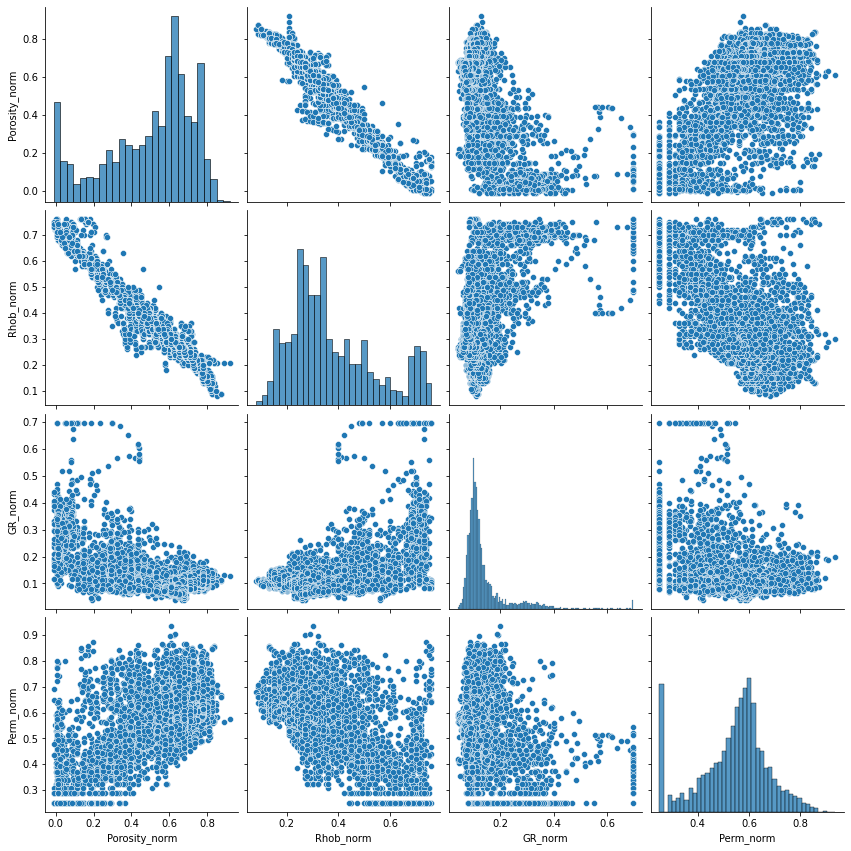

In [36]:
sns.pairplot(df.dropna(),height=3)

## Condition DataFrame:

In [37]:
df.head()
df = df.dropna()
df.fillna(-9999999999)
df.isnull().any()
#df

Porosity_norm    False
Rhob_norm        False
GR_norm          False
Perm_norm        False
dtype: bool

In [38]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Porosity_norm,5962.0,0.496677,0.230551,-0.009659,0.348743,0.571227,0.669220,0.918275
Rhob_norm,5962.0,0.373767,0.164145,0.080000,0.260000,0.330000,0.470000,0.760000
GR_norm,5962.0,0.136881,0.083969,0.039500,0.093900,0.110500,0.141075,0.698900
Perm_norm,5962.0,0.541430,0.134238,0.250000,0.472269,0.563398,0.620768,0.936001


### Split the data into feature vectors and labels:

Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.

In [39]:
#correct_labels = df['Mode_norm'].values
correct_labels = df['Perm_norm'].values


# works great feature_vectors = df.drop(['Mode_norm', 'Porosity','Perm','Mode','lPerm','lMode'], axis=1)
feature_vectors = df.drop(['Perm_norm'], axis=1)

In [40]:
print(len(correct_labels), len(feature_vectors))

5962 5962


In [41]:
feature_vectors.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Porosity_norm,5962.0,0.496677,0.230551,-0.009659,0.348743,0.571227,0.669220,0.918275
Rhob_norm,5962.0,0.373767,0.164145,0.080000,0.260000,0.330000,0.470000,0.760000
GR_norm,5962.0,0.136881,0.083969,0.039500,0.093900,0.110500,0.141075,0.698900


## We have worked from our own preprocessed normalized data and create 80% training and 20% test data:

In [42]:
from sklearn.model_selection import train_test_split

feature_vectors2=np.array(feature_vectors)


X_train, X_test, y_train, y_test = train_test_split(
     feature_vectors2, correct_labels, test_size=0.2, random_state=42)



In [43]:
print('Test' , max(y_test),min(y_test),len(y_test))
print('Train', max(y_train),min(y_train),len(y_train))

Test 0.9360009386028115 0.25 1193
Train 0.8959209445470226 0.25 4769


In [44]:
print(len(X_test))

1193


# Define Our Neural Network Model:

In [45]:
"""
neural_net_model is function applying 2 hidden layer feed forward neural net.
Weights and biases are abberviated as W_1, W_2 and b_1, b_2 
These are variables with will be optomized during training.
"""
def neural_net_model(X_data,input_dim):
    
    # layer 1 multiplying and adding bias then activation function
    W_1     = tf.Variable(tf.random_uniform([input_dim, 10]))
    b_1     = tf.Variable(tf.zeros([10]))
    layer_1 = tf.add(tf.matmul(X_data, W_1), b_1)
    layer_1 = tf.nn.relu(layer_1)
    
    # layer 2 multiplying and adding bias then activation function
    W_2     = tf.Variable(tf.random_uniform([10,10]))
    b_2     = tf.Variable(tf.zeros([10]))
    layer_2 = tf.add(tf.matmul(layer_1, W_2), b_2)
    layer_2 = tf.nn.relu(layer_2)

    # O/p layer multiplying and adding bias then activation function
    # notice output layer has one node only since performing #regression    
    W_O     = tf.Variable(tf.random_uniform([10, 1]))
    b_O     = tf.Variable(tf.zeros([1]))
    output  = tf.add(tf.matmul(layer_2, W_O), b_O)
    return output


    
    
xs     = tf.placeholder("float")
ys     = tf.placeholder("float")

'''
  - This is the number of training curves being used:
  *************   
'''
output = neural_net_model(xs,3)  # 3 training curves
'''
  *************   
'''

# our mean squared error cost function
cost   = tf.reduce_mean(tf.square(output-ys))

# Gradinent Descent optimiztion just discussed above for updating weights and biases
train  = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

##output is <tf.Tensor 'Add_8:0' shape=<unknown> dtype=float32>
#cost <tf.Tensor 'Mean_3:0' shape=() dtype=float32>
#train <tf.Operation 'GradientDescent_4' type=NoOp>

---
#  We will now use our pre-trained checkpoint results from the previous notebook and predict Permeability. 

**We will use our norm of Porosity, RHOB, GR to make our estimation of the normalized log10 of Perm.**


## Create a new normalized feature_vectors2 DataFrame from our well log data:

In [46]:
norm_array        = []
Porosity_norm   = []
GR_norm         = []
Rhob_norm       = []

#this is the mapinv_reference_data being used 
for i in range(0,len(porarray),1):

    Porosity_norm.append((porarray[i] - 0) / (.4 - 0))
    Rhob_norm.append(((RHOB[i]) - 2) / (3 - 2))
    GR_norm.append(((gr[i]) - 0) / (100 - 0))
    
    
    

df_por  = pd.DataFrame(Porosity_norm         , columns=['Porosity_norm'])
df_rhob = pd.DataFrame(Rhob_norm             , columns=['Rhob_norm'])
df_gr   = pd.DataFrame(GR_norm               , columns=['GR_norm'])




feature_vectors2 = pd.DataFrame()
feature_vectors2['Porosity_norm']  = df_por
feature_vectors2['Rhob_norm']      = df_rhob
feature_vectors2['GR_norm']        = df_gr


In [47]:
feature_vectors2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Porosity_norm,381.0,0.476638,0.216221,0.015459,0.354072,0.586315,0.636029,0.706788
Rhob_norm,381.0,0.410236,0.165094,0.250000,0.290000,0.330000,0.480000,0.750000
GR_norm,381.0,0.123467,0.067045,0.053700,0.086100,0.093900,0.119800,0.339400


## We use just 1 epoch, our saved checkpoint data and our well data feature_vector2 to estimate Permeability:

In [48]:
c_t    = []
c_test = []
count  = []



#epochs = 200 # with 20% training
epochs =  1 # over all the data

with tf.Session() as sess:

    # Initiate session and initialize all vaiables
    sess.run(tf.global_variables_initializer())
    
    '''
    In case you save weights, this is called at the end
    '''
    #saver = tf.train.Saver()
    saver = tf.train.Checkpoint()
    
    '''
    This next line will load the previous weights just the way it is written.
    It appears to be best to use 20% of random data to train with 50-100 epochs,
    and save the weights from that.
    
    Then load those weights using saver.restore over the zone of interest, 
    and use only 2-5 epochs on the zone of interest + previous checkpoints.
    '''
    #chkpt_file = "perm_dataset.ckpt"
    saver.restore('./perm_chkpt/perm_dataset.ckpt')
    
    for i in range(epochs):
        for j in range(X_train.shape[0]):
            '''
            the reshape(1,10) or (1, x ) x is number of curves used for training is set 
            in line below. Adjust also in paragraph above too.
            Run cost and train with each sample
            '''            
            sess.run([cost,train],feed_dict = {xs:X_train[j,:].reshape(1,3), ys:y_train[j]})
            
        count.append(i)
        c_t.append(sess.run(cost, feed_dict    = {xs:X_train,ys:y_train}))
        c_test.append(sess.run(cost, feed_dict = {xs:X_test,ys:y_test}))
        
        print('Epoch :',i,'Cost :',c_t[i])
        
    
    # predict output of test data after training
    pred = sess.run(output, feed_dict = {xs:feature_vectors2})
    #pred = sess.run(output, feed_dict = {xs:feature_vectors2})
    
    
    #### print('Cost :',sess.run(cost, feed_dict = {xs:X_test,ys:y_test}))


            

Metal device set to: Apple M1 Pro
Instructions for updating:
Restoring a name-based tf.train.Saver checkpoint using the object-based restore API. This mode uses global names to match variables, and so is somewhat fragile. It also adds new restore ops to the graph each time it is called when graph building. Prefer re-encoding training checkpoints in the object-based format: run save() on the object-based saver (the same one this message is coming from) and use that checkpoint in the future.


2022-03-16 09:40:19.107073: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-16 09:40:19.107262: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-16 09:40:19.110644: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-16 09:40:19.110703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-16 09:40:19.143202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch : 0 Cost : 0.03917173


2022-03-16 09:40:30.895424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-16 09:40:30.946408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


# De-normalize and Calculate Perm doing it our way and not with Sklearn:

In [49]:
# if Normalized data is Scaled 0 to 1
lPerm_est  = ((pred)*(4-(-4)) + (-4))
perm_est_tf   = 10**(lPerm_est)

## Depth Plot of Porosity with Optimized Carbonate Lithology and kNN and tf Permeability:

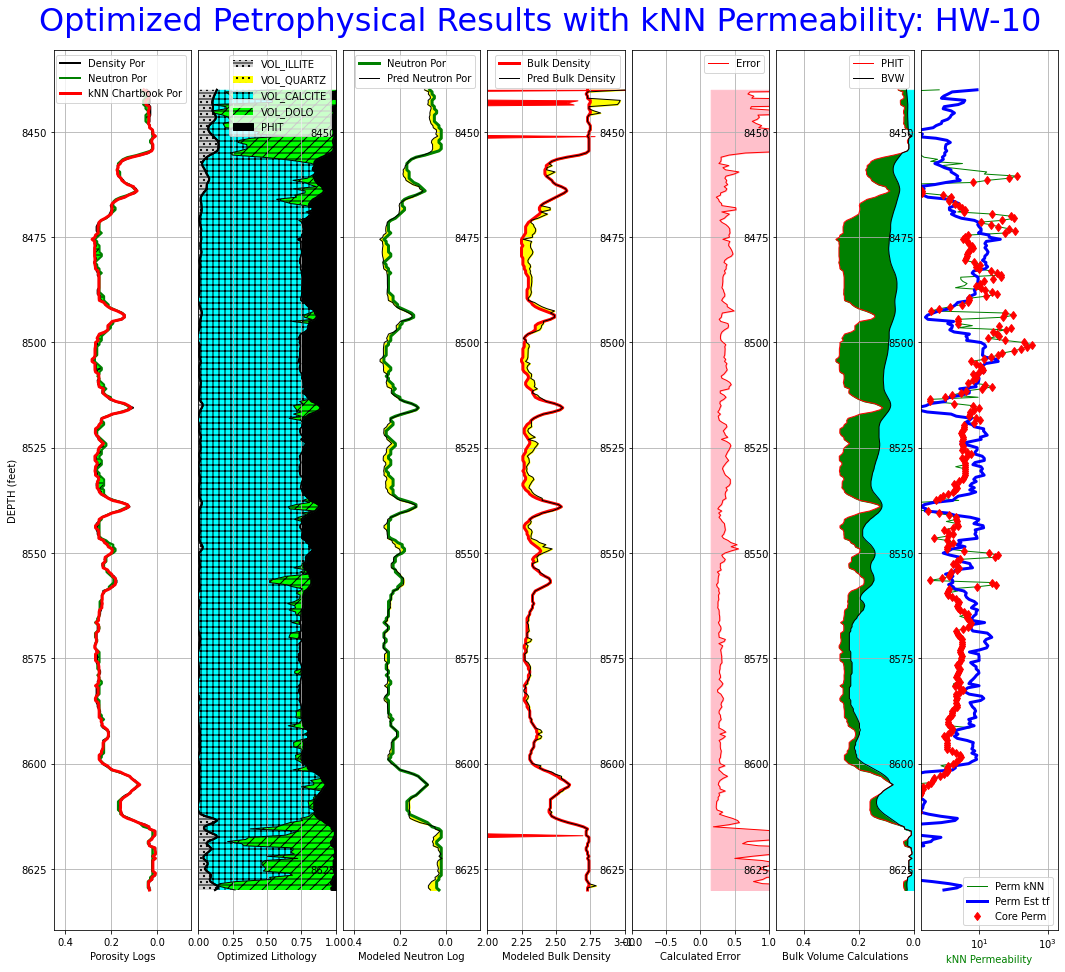

In [50]:
fig = plt.figure(figsize=(18,15))
#fig.suptitle('Optimized Petrophysical Results with kNN Permeability',fontsize=32,color='blue')
#fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)
wellname=las.well.well.value
fig.suptitle('Optimized Petrophysical Results with kNN Permeability: %s'%wellname, fontsize=32, color='blue')
fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)




gs = gridspec.GridSpec(1, 7)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[0,3])
ax5 = fig.add_subplot(gs[0,4])
ax6 = fig.add_subplot(gs[0,5])
ax7 = fig.add_subplot(gs[0,6])

y=np.array(deptharray)


# Porosity Logs
ax1.plot(porden, y,'-k',lw=2, label= 'Density Por')
ax1.plot(CNL, y,'-g', lw=2, label= 'Neutron Por')
ax1.plot(porarray, y,'-r',lw=3, label= 'kNN Chartbook Por')
ax1.set_xlabel("Porosity Logs",color='black')
ax1.set_ylabel('DEPTH (feet)')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_xlim(.45, -0.15)
ax1.fill_betweenx(y,CNL,porden, facecolor='#00ff00', hatch='--//')#, label= 'VOL_DOLO')
ax1.legend()



# Lithology
quartz=np.array(VOL_QUARTZ)
calcite=np.array(VOL_CALCITE)
dolo=np.array(VOL_DOLO)
illite=np.array(VOL_ILLITE)



ax2.plot(illite, y,'-k',lw=2)
ax2.plot(illite+quartz, y,'-k',lw=2)
ax2.plot(illite+quartz+calcite, y,'-k',lw=1)
ax2.plot(illite+quartz+calcite+dolo, y,'-k')
ax2.set_xlim(0, 1)
ax2.set_xlabel(('Optimized Lithology'), color='black')
ax2.fill_betweenx(y,0,illite, facecolor='#d1d1d1' ,hatch='.-.-',label= 'VOL_ILLITE')
ax2.fill_betweenx(y,illite,illite+quartz, facecolor='#ffff00' ,hatch='..',label= 'VOL_QUARTZ')
ax2.fill_betweenx(y,illite+quartz,illite+quartz+calcite, facecolor='#00ffff' ,hatch='++',label= 'VOL_CALCITE')
ax2.fill_betweenx(y,illite+quartz+calcite,illite+quartz+calcite+dolo, facecolor='#00ff00', hatch='--//', label= 'VOL_DOLO')
ax2.fill_betweenx(y,illite+quartz+calcite+dolo,1,color='black', label= 'PHIT')
ax2.legend()
#ax2=ax[2].twiny()
ax2.invert_yaxis()
ax2.grid(True)
#ax2.set_ylabel('DEPTH (feet)')
ax2.get_yaxis().set_visible(False)


# Modeled Neutron Log
ax3.plot(CNL, y,'-g', lw=3, label= 'Neutron Por')
ax3.plot(tnph_theoretical, y,'-k',lw=1, label= 'Pred Neutron Por')
ax3.set_xlabel("Modeled Neutron Log",color='black')
ax3.set_xlim(.45, -0.15)
ax3.fill_betweenx(y,CNL,tnph_theoretical, color='yellow')#, label= 'VOL_DOLO')
#ax3.get_yaxis().set_visible(False)
ax3.legend()
ax3.invert_yaxis()
ax3.grid(True)
#ax3.set_ylabel('DEPTH (feet)')

# Modeled Density Log
ax4.plot(RHOB, y,'-r', lw=3, label= 'Bulk Density')
ax4.plot(rhob_theoretical, y,'-k',lw=1, label= 'Pred Bulk Density')
ax4.set_xlabel("Modeled Bulk Density",color='black')
ax4.set_xlim(2, 3)
ax4.fill_betweenx(y,RHOB,rhob_theoretical, color='yellow')#, label= 'VOL_DOLO')
ax4.fill_betweenx(y,error_opt,0, color='red')#, label= 'VOL_DOLO')
#ax4.get_yaxis().set_visible(False)
ax4.legend()
ax4.invert_yaxis()
ax4.grid(True)
#ax4.set_ylabel('DEPTH (feet)')

# Error Theoretical vs. Actual normalized logs
ax5.plot(error_opt, y,'-r', lw=1, label= 'Error')
ax5.set_xlabel("Calculated Error",color='black')
ax5.set_xlim(-1.0, 1.0)
ax5.fill_betweenx(y,error_opt,0.15, color='pink')#, label= 'VOL_DOLO')
#ax4.get_yaxis().set_visible(False)
ax5.legend()
ax5.invert_yaxis()
ax5.grid(True)
#ax4.set_ylabel('DEPTH (feet)')


# Error Theoretical vs. Actual normalized logs
ax6.plot(porarray, y,'-r', lw=1, label= 'PHIT')
ax6.plot(bvw, y,'-k', lw=1, label= 'BVW')
ax6.set_xlabel("Bulk Volume Calculations",color='black')
ax6.set_xlim(0.5, 0.0)
ax6.fill_betweenx(y,porarray,bvw, color='green')#, label= 'VOL_DOLO')
ax6.fill_betweenx(y,bvw,0, color='cyan')#, label= 'VOL_DOLO')
ax6.legend()
ax6.invert_yaxis()
ax6.grid(True)

# Permeability
ax7.semilogx(perm_knn, y,'-g', lw=1, label= 'Perm kNN')
ax7.semilogx(perm_est_tf, y,'-b', lw=3, label= 'Perm Est tf')
ax7.semilogx(df_log['CORE_PERM'], y,'rd', lw=1, label= 'Core Perm')
ax7.set_xlabel("kNN Permeability",color='green')
ax7.set_xlim(0.2, 2000.0)
ax7.legend()
ax7.invert_yaxis()
ax7.grid(True)

# 4) Estimate Thomeer Parameters using kNN to Calculate Capillary Pressure Saturations:
### Read in Rosetta Stone HPMI Thomeer Parameter Reference Calibration Data.

In [51]:
#read the Excel .xlsx file - slow
#file = r'./data/mapinv_reference_data_carbonates_calculatedMode_Rosetta.xlsx'
file = r'./data/costa_hpmi_thomeer.xlsx'

thomeer_core_data = pd.read_excel(file,index_col=False)
thomeer_core_data = thomeer_core_data.replace(-999.25,np.nan)


Permeability_r = thomeer_core_data['PERMEABILITY']
Porosity_r = thomeer_core_data['POROSITY']
G1_r = thomeer_core_data['G1']
PD1_r = thomeer_core_data['PD1']
G2_r = thomeer_core_data['G2']
PD2_r = thomeer_core_data['PD2']
BV1_r = thomeer_core_data['BV1']
BV2_r = thomeer_core_data['BV2']
Mode_r = thomeer_core_data['Mode']
ROCK_INDEX_r = thomeer_core_data['ROCK_INDEX']    


## kNN used to Estimate Thomeer Parameters (Pd, G and BVocc) and Rock Index (PRT):

In [52]:
from collections import Counter 


por_min = 0
por_max = 0.4
perm_min = -4
perm_max = 4

g1_est_knn  = []
pd1_est_knn = []
bv1_est_knn = []
g2_est_knn  = []
pd2_est_knn = []
bv2_est_knn = []
mode=[]



def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0]


#List = [mat_sort[0][7],mat_sort[1][7],mat_sort[2][7],mat_sort[3][7],mat_sort[4][7]]

rock_index_knn = []
rock_type = []
mode=[]

#mode = math.exp(-1.15*g1_est_knn) * (214/pd1_est_knn)
#Rock_Index_est_knn = int(Rock_Index_total_knn / n_neighbors)


for k in range(0,len(df_log) ,1):  
    
   # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #            Read in log data from Geolog
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    #phit/0.95 is an approximation for ambient core porosity to query the Rosetta Stone data
    Por = porarray[k]/0.95
    Perm = perm_knn[k]


    # =============================================================================
     # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #            This is the beginning of kNN for Thomeer parameter Estimations
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
 
    #normalized Geolog well Porosity and Permeability data
    por_norm  = (Por-por_min) / (por_max - por_min)
    perm_norm = (np.log10(Perm) - perm_min) / (perm_max - perm_min) 
 
    # =============================================================================
    # #---------------------------------------------------------------------------- 
    # #           
    # #              ESTIMATE THOMEER PARAMETERS FOR BOTH PORE SYSTEMS
    # #                   
    # #----------------------------------------------------------------------------
    # =============================================================================

    dist_inv = []
    dist_phi = []
    dist_lperm = []
    G1_weight = []
    PD1_weight = []
    BV1_weight = []
    G2_weight = []
    PD2_weight = []
    BV2_weight = []
    #Rock_Index_weight = []


    dist_inv_total=0
    G1_total  = 0
    PD1_total = 0
    BV1_total = 0
    G2_total  = 0
    PD2_total = 0
    BV2_total = 0




    inv_dist_array = []
    #distance_knn_array = [rows,columns]
    distance_knn_array = []


    #------------------------------------------------------------------ 
    #               Estimate all Thomeer Parameters for *_est values
    #-------------------------------------------------------------------

    Porosity_norm     = []
    Permeability_norm = []


    '''
    This is the Reference Data being used here
    '''
    for i in range(0,len(thomeer_core_data),1):

        Porosity_norm.append((Porosity_r[i] - por_min) / (por_max - por_min))
        Permeability_norm.append((np.log10(Permeability_r[i]) - perm_min) / (perm_max - perm_min))
        
        #Euclidian Distance
        dist_phi.append(   abs(por_norm  - Porosity_norm[i]    ))  
        dist_lperm.append( abs(perm_norm - Permeability_norm[i]))
        dist_inv.append( 1  /  math.sqrt(  dist_phi[i]**2 + dist_lperm[i]**2)  )

        
        #calculalte weights for each
        G1_weight.append(dist_inv[i]  * G1_r[i])
        PD1_weight.append(dist_inv[i] * PD1_r[i])
        BV1_weight.append(dist_inv[i] * BV1_r[i])
        G2_weight.append(dist_inv[i]  * G2_r[i])
        PD2_weight.append(dist_inv[i] * PD2_r[i])
        BV2_weight.append(dist_inv[i] * BV2_r[i])
        #Rock_Index_weight.append(dist_inv[i] * Rock_Index[i])
        


        inv_dist_array.append(dist_inv[i]);  # add items

    # =============================================================================
    ###                    Create the KNN Array
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
        distance_knn_array = [dist_inv, G1_weight, PD1_weight, BV1_weight, G2_weight, PD2_weight, BV2_weight, ROCK_INDEX_r]
    #        distance_knn_array = [Permeability, Porosity, G1, PD1, BV1, G2, PD2, BV2]
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    #xnorm=np.array(Porosity_norm)
    #ynorm=np.array(Permeability_norm)


    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #               Transpose and Sort the kNN array
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    #knn_array = np.transpose array
    knn_array = np.transpose(distance_knn_array)
    #print(knn_array)

    #Sort array from large to low by column 0 which is dist_inv 
    #xknn=np.array(knn_array)

    #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
    mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)
    #mat_sort = x[x[:,1].argsort()[::-1]]
    #mat_sort = x[x[:,2].argsort()[::-1]]



    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #               Calculate knn Thomeer Parameters
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================


    #------------------------------------------------------------------------------
    #    Number of nearest Neighbors
    #------------------------------------------------------------------------------
    n_neighbors = 3
    #------------------------------------------------------------------------------

    dist_inv_total_knn = 0
    G1_total_knn = 0
    PD1_total_knn = 0
    BV1_total_knn = 0
    G2_total_knn = 0
    PD2_total_knn = 0
    BV2_total_knn = 0
    #Rock_Index_total_knn = 0



    #kNN Estimates for first 3 rows
    #dist_inv_total = mat_sort[0][0] + mat_sort[1][0] + mat_sort[2][0]
    for i in range(0,n_neighbors,1):
        dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
        G1_total_knn  = G1_total_knn + mat_sort[i][1]
        PD1_total_knn = PD1_total_knn + mat_sort[i][2]
        BV1_total_knn = BV1_total_knn + mat_sort[i][3]
        G2_total_knn  = G2_total_knn + mat_sort[i][4]
        PD2_total_knn = PD2_total_knn + mat_sort[i][5]
        BV2_total_knn = BV2_total_knn + mat_sort[i][6]
        #Rock_Index_total_knn = Rock_Index_total_knn + mat_sort[i][7]
        #print(mat_sort[i][7])
        
        
    # Estimate Thomeer parameters to be written into Geolog well
    g1_est_knn.append(G1_total_knn  / dist_inv_total_knn)
    pd1_est_knn.append( PD1_total_knn / dist_inv_total_knn)
    bv1_est_knn.append( BV1_total_knn / dist_inv_total_knn)
    #g2_est_knn.append( G2_total_knn  / dist_inv_total_knn)
    #pd2_est_knn.append( PD2_total_knn / dist_inv_total_knn)
    #bv2_est_knn.append( BV2_total_knn / dist_inv_total_knn)
    mode.append(  math.exp(-1.15*g1_est_knn[k]) * (214/pd1_est_knn[k]) )

    
    
    '''
    The Costa HPMI Thomeer results do not have enough 2nd Pore system data to model this pore system.
    if you are using the Rosetta Stone data, then please comment out the following lines. 
    '''
    g2_est_knn.append( .1)
    pd2_est_knn.append( 650)
    bv2_est_knn.append( 0)

    
    
    
    '''
    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #              Rock Type from Most Common in KNN series
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================      
    '''
    
    List = []    
    
    for d in range(0,n_neighbors):
        List.append(mat_sort[d,7])
    
    most_frequent(List)   == rock_index_knn
    
    
    #print(most_frequent(List)) 
    if most_frequent(List)   == 1:
        rock_index_knn.append(1)

         
    elif most_frequent(List) == 2: 
        rock_index_knn.append(3)

         
    elif most_frequent(List) == 3:
        rock_index_knn.append(3)

         
    elif most_frequent(List) == 4:
        rock_index_knn.append(4)

    
    elif most_frequent(List) == 5:
        rock_index_knn.append(5)

         
    else:
        rock_index_knn.append(6)

   
print(len(rock_index_knn))
print(len(bv1_est_knn))
print(len(bv2_est_knn))


381
381
381


/var/folders/lf/9hqr0q153ls52s9btzjc56080000gp/T/ipykernel_34489/3834534086.py:115: RuntimeWarning: divide by zero encountered in log10
  Permeability_norm.append((np.log10(Permeability_r[i]) - perm_min) / (perm_max - perm_min))


## Depth Plot of kNN Perm and Thomeer Parameter Estimations:

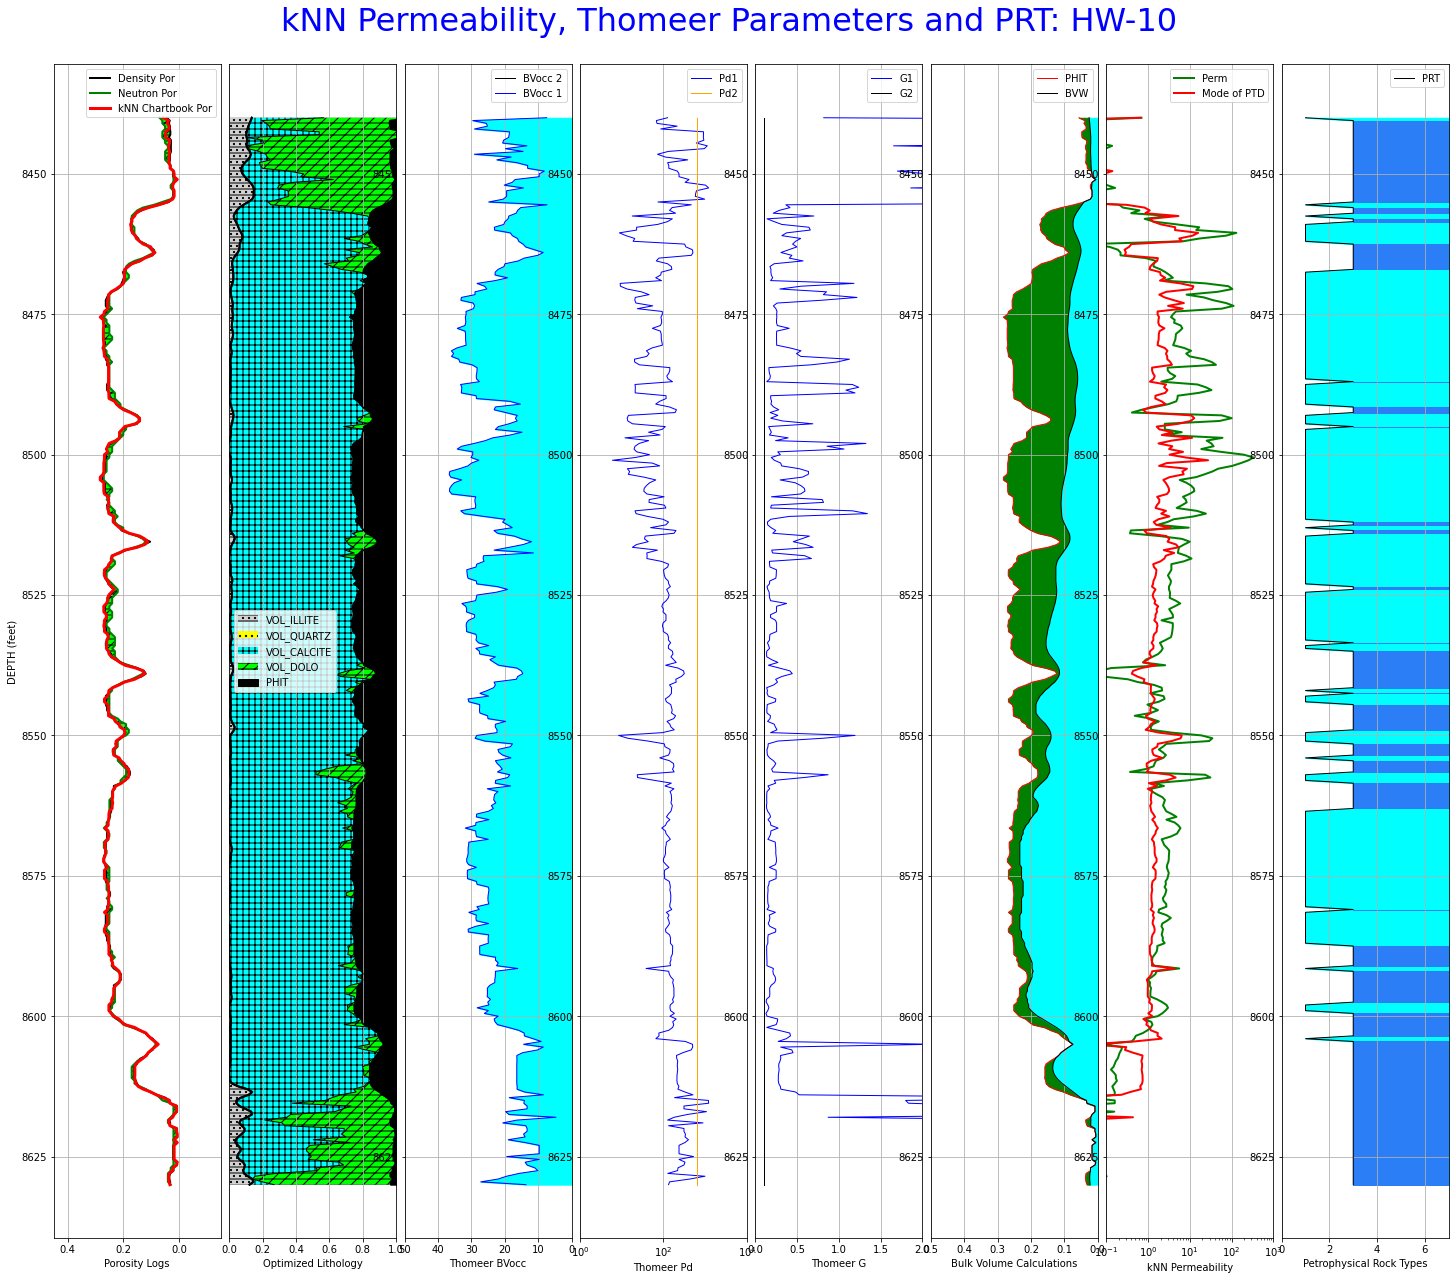

In [53]:
fig = plt.figure(figsize=(25,20))
#fig.suptitle('kNN Permeability, Thomeer Parameters and PRT',fontsize=32, color='blue')
#fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)
wellname=las.well.well.value
fig.suptitle('kNN Permeability, Thomeer Parameters and PRT: %s'%wellname, fontsize=32, color='blue')
fig.subplots_adjust(top=0.94, wspace=0.05, hspace =0.1)



gs = gridspec.GridSpec(1, 8)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[0,3])
ax5 = fig.add_subplot(gs[0,4])
ax6 = fig.add_subplot(gs[0,5])
ax7 = fig.add_subplot(gs[0,6])
ax8 = fig.add_subplot(gs[0,7])


# Porosity Logs
ax1.plot(porden, y,'-k',lw=2, label= 'Density Por')
ax1.plot(CNL, y,'-g', lw=2, label= 'Neutron Por')
ax1.plot(porarray, y,'-r',lw=3, label= 'kNN Chartbook Por')
ax1.set_xlabel("Porosity Logs",color='black')
ax1.set_ylabel('DEPTH (feet)')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_xlim(.45, -0.15)
ax1.fill_betweenx(y,CNL,porden, facecolor='#00ff00', hatch='--//')#, label= 'VOL_DOLO')
ax1.legend()



# Lithology
quartz=np.array(VOL_QUARTZ)
calcite=np.array(VOL_CALCITE)
dolo=np.array(VOL_DOLO)
illite=np.array(VOL_ILLITE)



ax2.plot(illite, y,'-k',lw=2)
ax2.plot(illite+quartz, y,'-k',lw=2)
ax2.plot(illite+quartz+calcite, y,'-k',lw=1)
ax2.plot(illite+quartz+calcite+dolo, y,'-k')
ax2.set_xlim(0, 1)
ax2.set_xlabel(('Optimized Lithology'), color='black')
ax2.fill_betweenx(y,0,illite, facecolor='#d1d1d1' ,hatch='.-.-',label= 'VOL_ILLITE')
ax2.fill_betweenx(y,illite,illite+quartz, facecolor='#ffff00' ,hatch='..',label= 'VOL_QUARTZ')
ax2.fill_betweenx(y,illite+quartz,illite+quartz+calcite, facecolor='#00ffff' ,hatch='++',label= 'VOL_CALCITE')
ax2.fill_betweenx(y,illite+quartz+calcite,illite+quartz+calcite+dolo, facecolor='#00ff00', hatch='--//', label= 'VOL_DOLO')
ax2.fill_betweenx(y,illite+quartz+calcite+dolo,1,color='black', label= 'PHIT')
ax2.legend()
#ax2=ax[2].twiny()
ax2.invert_yaxis()
ax2.grid(True)
#ax2.set_ylabel('DEPTH (feet)')
ax2.get_yaxis().set_visible(False)




# Thomeer BVocc 
BVocc1=np.array(bv1_est_knn)
BVocc2=np.array(bv2_est_knn)

# BVocc Depth Track
ax3.plot(BVocc2, y,'-k', lw=1, label= 'BVocc 2')
ax3.plot(BVocc2+BVocc1,y,'-b',lw=1, label= 'BVocc 1')
#ax3.plot(BVocc2+BVocc1,y,'-b',lw=1, label= 'BVocc 1')

ax3.set_xlabel("Thomeer BVocc",color='black')
ax3.set_xlim(50., 0.0)
ax3.fill_betweenx(y,BVocc2,BVocc1+BVocc2, color='cyan')#, label= 'VOL_DOLO')
ax3.fill_betweenx(y,0,bv2_est_knn, color='orange')#, label= 'VOL_DOLO')
#ax3.get_yaxis().set_visible(False)
ax3.legend()
ax3.invert_yaxis()
ax3.grid(True)


# Thomeer Pd
Pd1=np.array(pd1_est_knn)
Pd2=np.array(pd2_est_knn)

# Pd Track
ax4.semilogx(Pd1, y,'-b', lw=1, label= 'Pd1')
ax4.semilogx(Pd2, y,'-',color='orange', lw=1, label= 'Pd2')
ax4.set_xlabel("Thomeer Pd",color='black')
ax4.set_xlim(1, 10000)
ax4.legend()
ax4.invert_yaxis()
ax4.grid(True)
#ax4.set_ylabel('DEPTH (feet)')


# Thomeer G
G1=np.array(g1_est_knn)
G2=np.array(g2_est_knn)

# Thomeer G
ax5.plot(G1, y,'-b', lw=1, label= 'G1')
ax5.plot(G2, y,'-k', lw=1, label= 'G2')
ax5.set_xlabel("Thomeer G",color='black')
ax5.set_xlim(0, 2.0)
ax5.legend()
ax5.invert_yaxis()
ax5.grid(True)



# Error Theoretical vs. Actual normalized logs

ax6.plot(porarray, y,'-r', lw=1, label= 'PHIT')
ax6.plot(bvw, y,'-k', lw=1, label= 'BVW')
ax6.set_xlabel("Bulk Volume Calculations",color='black')
ax6.set_xlim(0.5, 0.0)
ax6.fill_betweenx(y,porarray,bvw, color='green')#, label= 'VOL_DOLO')
ax6.fill_betweenx(y,bvw,0, color='cyan')#, label= 'VOL_DOLO')
ax6.legend()
ax6.invert_yaxis()
ax6.grid(True)



# Permeability
ax7.semilogx(perm_knn, y,'-g', lw=2, label= 'Perm')
ax7.semilogx(mode, y,'-r', lw=2, label= 'Mode of PTD')
ax7.set_xlabel("kNN Permeability",color='black')
ax7.set_xlim(0.1, 1000.0)
ax7.legend()
ax7.invert_yaxis()
ax7.grid(True)




# Rock Index or PRT
ax8.plot(rock_index_knn, y,'-k', lw=1, label= 'PRT')
ax8.set_xlabel("Petrophysical Rock Types",color='black')
ax8.set_xlim(0., 7.0)
ax8.fill_betweenx(y,rock_index_knn,7, color='cyan')
ax8.legend()
ax8.invert_yaxis()
ax8.grid(True)

## Setting Up Shading for GR
left_col_value = 2
right_col_value = 7
span = abs(left_col_value - right_col_value)
cmap = plt.get_cmap('rainbow')
#cmap = plt.get_cmap('cool')

color_index = np.arange(left_col_value, right_col_value, span / 6)
#loop through each value in the color_index
for index in sorted(color_index):
    index_value = (index - left_col_value)/span
    color = cmap(index_value) #obtain color for color index value
    ax8.fill_betweenx(y, rock_index_knn , right_col_value, where = rock_index_knn >= index,  color = color)



# 5) Thomeer Capillary Pressure Bulk Volume Oil (BVO) Calculations:

## Free Water Level (FWL) Search
We have provided a FWL Search technique in python too to estimate the FWL elevation (TVDss) in each key well to be used to create a FWL plane for the field. To model Capillary Pressure saturations, it is essential to have a proper Free Water Level (FWL). Reservoir Capillary Pressure or buoyancy is dependent upon the height above the FWL. 

On new discoveries the FWL is usually determined from Formation Test data plotting the pressure data vs. TVDss to find the intersection of the water gradient vs. hydrocarbon gradient. The elevation of this intersection is the FWL or zero Capillary Pressure. However, on older fields, this type of data is typically not available prior to pressure depletion and/or fluid contact movements in the field. Therefore, we need another way to estimate the FWL for the field. In the python software used in our Notebook we offer a FWL search technique that has been shown to work very well in numerous fields.

We perform this well-by-well FWL search by varying the FWL elevation from an estimated highest FWL to the lowest expected FWL (spill point...) for the reservoir.  We then calculate the error difference between the Bulk Volume Oil (BVO) from logs vs. BVO from Thomeer Capillary Pressure at each new FWL estimate for that well. The final fwl_est is the FWL estimated with the lowest Bulk Volume Oil (BVO) error for that well. This fwl_est is then used in our final Thomeer BVO Oil calculations.

The FWL search is usually run on all wells with a fwl_est for each well. In many instances in fields with large hydrocarbon columns, the wells near the crest will be too high above the FWL to give valid results. We have found that the wells near the edge usually give the best estimation. However, those wells affected by water encroachment will also not give valid results. In the end it is usually a small percentage of wells near the edge of the field that will give valid FWL estimates that are consistent. The search results from these wells are then typically used to construct a plane in the 3D fine-grid model to represent the FWL for the field.

It should be noted, that not all FWL surfaces are flat. Structural tilting, subduction, and dynamic aquifers... can result in a tilted FWL elevations with the possibility of residual oil below the FWL, depending in the situation. 

In [54]:
print(elev_meas_ref)

397


In [55]:
#elev_meas_ref = 397

tcosthetaww = 12
rho_f = 1.135
rho_hc = 0.837

bvo_error_temp=222


FWL_UPPER_ESTIMATE = 8100
FWL_LOWER_ESTIMATE = 8300

# loop through FWL Search from 8100 to 8300 steps 
for fwl in range(FWL_UPPER_ESTIMATE, FWL_LOWER_ESTIMATE,2):

    
    h=[]
    PcRes=[]
    PcHg=[]
    por_upscale_fact=[]
    bvocc1=[]
    bvocc2=[]
    bvo_thomeer=[]
    bvo_error=[]
    bvo_error_sum=0
    bvo_error_level=[]
    sw_thomeer=[] 


    # Load log data from df
    for k in range(0,len(df_log) ,1):  

        # =============================================================================
        # # ===========================================================================
        # # #--------------------------------------------------------------------------
        # # #
        # # #            Calculate Thomeer-based BVO Saturations
        # # #
        # # #--------------------------------------------------------------------------
        # # ===========================================================================
        # =============================================================================

        h.append(fwl - (Dep[k]-elev_meas_ref))  #Works Well


        PcRes.append(h[k] *0.433*(rho_f - rho_hc))
        PcHg.append((367/tcosthetaww)*PcRes[k])   

        #------------- Thomeer Upscale Porosity Correction Factor  ------------------------

        bv1=bv1_est_knn[k]/100
        bv2=bv2_est_knn[k]/100

        if porarray[k] > 0.01:
            por_upscale_fact.append((0.1629 * math.log(porarray[k]) + 1.2923) * (porarray[k]/(bv1+bv2)) )
        else:
            por_upscale_fact.append(0.55)

        #------- End of Thomeer Porosity Upscale Correction Factor---------------------------



        #---------------  Calculalte Bulk Volume Occupied at each well-level ----------------
        if PcHg[k] > pd1_est_knn[k]:
            #bvocc1 = bv1*bv_upscale_fact * 10**(-0.434*g1/math.log10(((367/tcosthetaww)*h*0.433*(rho_f - rho_hc))/pd1))
            bvocc1.append(bv1*por_upscale_fact[k]*10**(-0.434*g1_est_knn[k]/math.log10(PcHg[k]/pd1_est_knn[k]))) 

        else:
            bvocc1.append(0.001)

        if PcHg[k] > pd2_est_knn[k]:
            #bvocc2 = bv2*bv_upscale_fact * 10**(-0.434*g2/math.log10(((367/tcosthetaww)*h*0.433*(rho_f - rho_hc))/pd2))
            bvocc2.append(bv2*por_upscale_fact[k]*10**(-0.434*g2_est_knn[k]/math.log10(PcHg[k]/pd2_est_knn[k]))) 
        else:
            bvocc2.append(0.001)



        #---------   Calculate BVO Error  ------------------------------------------------
        bvo_thomeer.append( bvocc1[k] + bvocc2[k])
        sw_thomeer.append(1 - bvo_thomeer[k]/porarray[k])
        bvo_error.append(abs(bvo[k]-bvo_thomeer[k]))
        #print(bvo_error[k],fwl) 
        bvo_error_sum=(bvo_error_sum + bvo_error[k])
    
 


    if bvo_error_sum<bvo_error_temp:
        fwl_est = fwl

    print('FWL Try=',fwl,'\t','BVO_Error_Sum =', bvo_error_sum,'\t','fwl_est =',fwl_est)
    
    bvo_error_temp=bvo_error_sum

print()
print()

FWL Try= 8100 	 BVO_Error_Sum = 26.179607352307173 	 fwl_est = 8100
FWL Try= 8102 	 BVO_Error_Sum = 25.84278053297845 	 fwl_est = 8102
FWL Try= 8104 	 BVO_Error_Sum = 25.543964435887265 	 fwl_est = 8104
FWL Try= 8106 	 BVO_Error_Sum = 25.146332524305123 	 fwl_est = 8106
FWL Try= 8108 	 BVO_Error_Sum = 24.65325977812023 	 fwl_est = 8108
FWL Try= 8110 	 BVO_Error_Sum = 24.249058122124936 	 fwl_est = 8110
FWL Try= 8112 	 BVO_Error_Sum = 23.67735636414085 	 fwl_est = 8112
FWL Try= 8114 	 BVO_Error_Sum = 23.077803063410066 	 fwl_est = 8114
FWL Try= 8116 	 BVO_Error_Sum = 22.55049474202313 	 fwl_est = 8116
FWL Try= 8118 	 BVO_Error_Sum = 22.09923677088259 	 fwl_est = 8118
FWL Try= 8120 	 BVO_Error_Sum = 21.695747169583758 	 fwl_est = 8120
FWL Try= 8122 	 BVO_Error_Sum = 21.29597979932575 	 fwl_est = 8122
FWL Try= 8124 	 BVO_Error_Sum = 20.88442962570471 	 fwl_est = 8124
FWL Try= 8126 	 BVO_Error_Sum = 20.44349906928764 	 fwl_est = 8126
FWL Try= 8128 	 BVO_Error_Sum = 19.945380624746218 	 fwl

### Final Thomeer BVO calculations from the above FWL Search results: 

In [56]:
h=[]
PcRes=[]
PcHg=[]
por_upscale_fact=[]
bvocc1=[]
bvocc2=[]
bvo_thomeer=[]
sw_thomeer=[]


fwl=fwl_est
#fwl=8200
#elev_meas_ref = 397

tcosthetaww = 12
rho_f = 1.135
rho_hc = 0.837

# Load log data from df
for k in range(0,len(df_log) ,1):  

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #            Calculate Thomeer-based BVO Saturations
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    h.append(fwl - (Dep[k]-elev_meas_ref))  #Works Well
  
      
    PcRes.append(h[k] *0.433*(rho_f - rho_hc))
    PcHg.append((367/tcosthetaww)*PcRes[k])   

    #------------- Thomeer Upscale Porosity Correction Factor  ------------------------
          
    bv1=bv1_est_knn[k]/100
    bv2=bv2_est_knn[k]/100

    if porarray[k] > 0.01:
        por_upscale_fact.append((0.1629 * math.log(porarray[k]) + 1.2923) * (porarray[k]/(bv1+bv2)) )
    else:
        por_upscale_fact.append(0.55)
   
    #------- End of Thomeer Porosity Upscale Correction Factor---------------------------
         
         
           
    #---------------  Calculalte Bulk Volume Occupied at each well-level ----------------
    if PcHg[k] > pd1_est_knn[k]:
        #bvocc1 = bv1*bv_upscale_fact * 10**(-0.434*g1/math.log10(((367/tcosthetaww)*h*0.433*(rho_f - rho_hc))/pd1))
        bvocc1.append(bv1*por_upscale_fact[k]*10**(-0.434*g1_est_knn[k]/math.log10(PcHg[k]/pd1_est_knn[k]))) 
     
    else:
        bvocc1.append(0.001)

    if PcHg[k] > pd2_est_knn[k]:
        #bvocc2 = bv2*bv_upscale_fact * 10**(-0.434*g2/math.log10(((367/tcosthetaww)*h*0.433*(rho_f - rho_hc))/pd2))
        bvocc2.append(bv2*por_upscale_fact[k]*10**(-0.434*g2_est_knn[k]/math.log10(PcHg[k]/pd2_est_knn[k]))) 
    else:
        bvocc2.append(0.001)

 

    #---------   Calculate BVO and Sw  ------------------------------------------------
    bvo_thomeer.append( bvocc1[k]  + bvocc2[k])
    sw_thomeer.append(1 - bvo_thomeer[k]/porarray[k])

    #print(porarray[k],bvocc1[k],bvocc2[k],bvo_thomeer[k],sw_thomeer[k])
    
    
    
print(fwl,len(bvocc1),len(bvocc2), len(bvocc2),len(sw_thomeer))

8192 381 381 381 381


In [57]:
h=[]
PcRes=[]
PcHg=[]
por_upscale_fact=[]
bvocc1=[]
bvocc2=[]
bvo_thomeer=[]
sw_thomeer=[]


#fwl=fwl_est
fwl=8200
#elev_meas_ref = 397

tcosthetaww = 12
rho_f = 1.135
rho_hc = 0.837

# Load log data from df
for k in range(0,len(df_log) ,1):  

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #            Calculate Thomeer-based BVO Saturations
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    h.append(fwl - (Dep[k]-elev_meas_ref))  #Works Well
  
      
    PcRes.append(h[k] *0.433*(rho_f - rho_hc))
    PcHg.append((367/tcosthetaww)*PcRes[k])   

    #------------- Thomeer Upscale Porosity Correction Factor  ------------------------
    
    if bv2_est_knn[k] < 0:
        bv2_est_knn[k] = 0
    if g2_est_knn[k] <0 :
        g2_est_knn[k] = .5
    if pd2_est_knn[k] < 0 :
        pd2_est_knn[k] = 7000
        
        
        
    bv1=bv1_est_knn[k]/100
    #bv2=bv2_est_knn[k]/100
        
        

    if porarray[k] > 0.01:
        por_upscale_fact.append((0.1629 * math.log(porarray[k]) + 1.2923) * (porarray[k]/(bv1+bv2)) )
    else:
        por_upscale_fact.append(0.55)
   
    #------- End of Thomeer Porosity Upscale Correction Factor---------------------------
         
         
           
    #---------------  Calculalte Bulk Volume Occupied at each well-level ----------------
    if PcHg[k] > pd1_est_knn[k]:
        #bvocc1 = bv1*bv_upscale_fact * 10**(-0.434*g1/math.log10(((367/tcosthetaww)*h*0.433*(rho_f - rho_hc))/pd1))
        bvocc1.append(bv1*por_upscale_fact[k]*10**(-0.434*g1_est_knn[k]/math.log10(PcHg[k]/pd1_est_knn[k]))) 
     
    else:
        bvocc1.append(0.001)

    if PcHg[k] > pd2_est_knn[k]:
        #bvocc2 = bv2*bv_upscale_fact * 10**(-0.434*g2/math.log10(((367/tcosthetaww)*h*0.433*(rho_f - rho_hc))/pd2))
        bvocc2.append(bv2*por_upscale_fact[k]*10**(-0.434*g2_est_knn[k]/math.log10(PcHg[k]/pd2_est_knn[k]))) 
    else:
        bvocc2.append(0.001)

 

    #---------   Calculate BVO and Sw  ------------------------------------------------
    bvo_thomeer.append( bvocc1[k] )# + bvocc2[k])
    sw_thomeer.append(1 - bvo_thomeer[k]/porarray[k])

    #print(porarray[k],bvocc1[k],bvocc2[k],bvo_thomeer[k],sw_thomeer[k])
    
    
    
print(fwl,len(bvocc1),len(bvocc2), len(bvocc2),len(sw_thomeer))

8200 381 381 381 381


## Depth Plot of BVO:

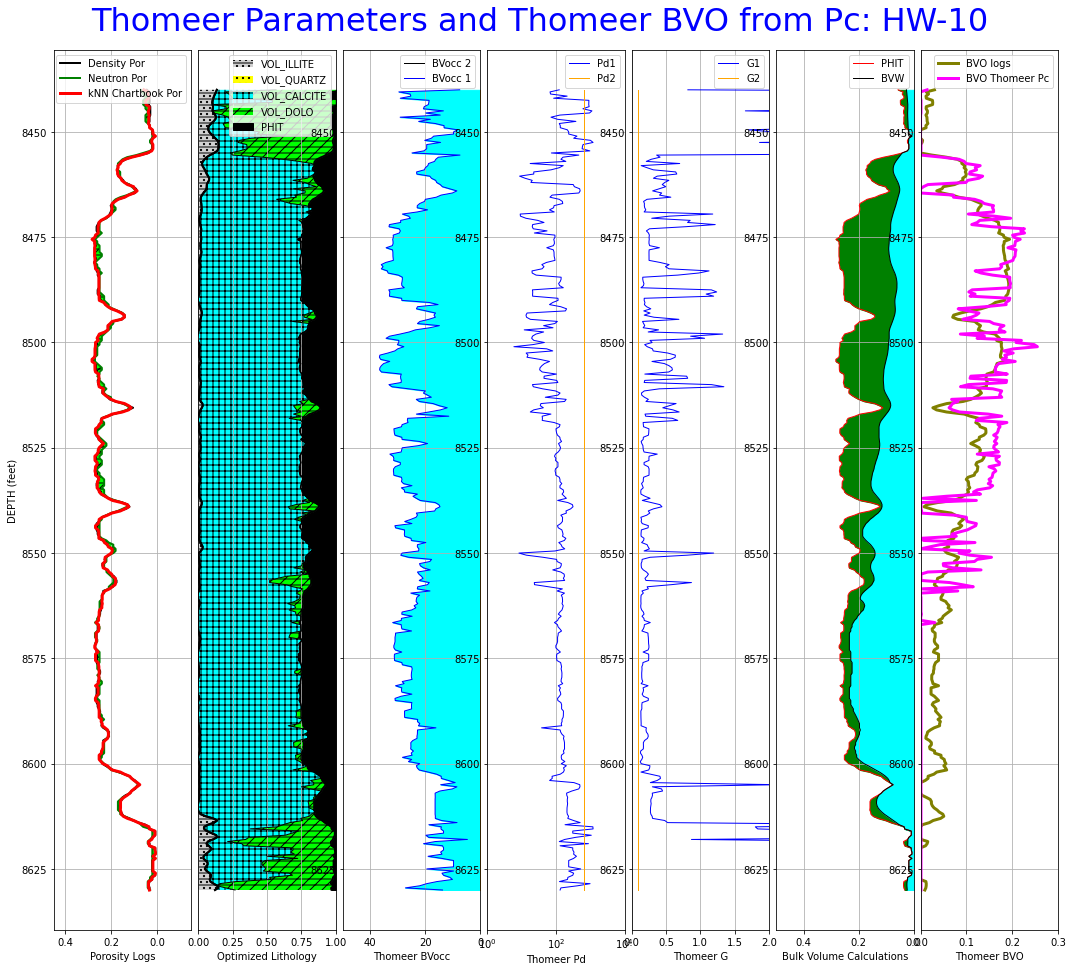

In [58]:
fig = plt.figure(figsize=(18,15))
#fig.suptitle('Thomeer Parameters and Thomeer BVO from Pc',fontsize=32,color='blue')
#fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)
wellname=las.well.well.value
fig.suptitle('Thomeer Parameters and Thomeer BVO from Pc: %s'%wellname, fontsize=32, color='blue')#,y=0.9)
fig.subplots_adjust(top=0.94,wspace=0.05, hspace =0.1)


gs = gridspec.GridSpec(1, 7)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[0,3])
ax5 = fig.add_subplot(gs[0,4])
ax6 = fig.add_subplot(gs[0,5])
ax7 = fig.add_subplot(gs[0,6])


# Porosity Logs
ax1.plot(porden, y,'-k',lw=2, label= 'Density Por')
ax1.plot(CNL, y,'-g', lw=2, label= 'Neutron Por')
ax1.plot(porarray, y,'-r',lw=3, label= 'kNN Chartbook Por')
ax1.set_xlabel("Porosity Logs",color='black')
ax1.set_ylabel('DEPTH (feet)')
ax1.invert_yaxis()
ax1.grid(True)
ax1.set_xlim(.45, -0.15)
ax1.fill_betweenx(y,CNL,porden, facecolor='#00ff00', hatch='--//')#, label= 'VOL_DOLO')
ax1.legend()



# Lithology
quartz=np.array(VOL_QUARTZ)
calcite=np.array(VOL_CALCITE)
dolo=np.array(VOL_DOLO)
illite=np.array(VOL_ILLITE)



ax2.plot(illite, y,'-k',lw=2)
ax2.plot(illite+quartz, y,'-k',lw=2)
ax2.plot(illite+quartz+calcite, y,'-k',lw=1)
ax2.plot(illite+quartz+calcite+dolo, y,'-k')
ax2.set_xlim(0, 1)
ax2.set_xlabel(('Optimized Lithology'), color='black')
ax2.fill_betweenx(y,0,illite, facecolor='#d1d1d1' ,hatch='.-.-',label= 'VOL_ILLITE')
ax2.fill_betweenx(y,illite,illite+quartz, facecolor='#ffff00' ,hatch='..',label= 'VOL_QUARTZ')
ax2.fill_betweenx(y,illite+quartz,illite+quartz+calcite, facecolor='#00ffff' ,hatch='++',label= 'VOL_CALCITE')
ax2.fill_betweenx(y,illite+quartz+calcite,illite+quartz+calcite+dolo, facecolor='#00ff00', hatch='--//', label= 'VOL_DOLO')
ax2.fill_betweenx(y,illite+quartz+calcite+dolo,1,color='black', label= 'PHIT')
ax2.legend()
#ax2=ax[2].twiny()
ax2.invert_yaxis()
ax2.grid(True)
#ax2.set_ylabel('DEPTH (feet)')
ax2.get_yaxis().set_visible(False)




# Thomeer BVocc 
BVocc1=np.array(bv1_est_knn)
BVocc2=np.array(bv2_est_knn)

# BVocc Depth Track
ax3.plot(BVocc2, y,'-k', lw=1, label= 'BVocc 2')
ax3.plot(BVocc1+BVocc2,y,'-b',lw=1, label= 'BVocc 1')
ax3.set_xlabel("Thomeer BVocc",color='black')
ax3.set_xlim(50., 0.0)
ax3.fill_betweenx(y,BVocc2,BVocc1+BVocc2, color='cyan')#, label= 'VOL_DOLO')
ax3.fill_betweenx(y,0,BVocc2, color='orange')#, label= 'VOL_DOLO')
#ax3.get_yaxis().set_visible(False)
ax3.legend()
ax3.invert_yaxis()
ax3.grid(True)


# Thomeer Pd
Pd1=np.array(pd1_est_knn)
Pd2=np.array(pd2_est_knn)

# Pd Track
ax4.semilogx(Pd1, y,'-b', lw=1, label= 'Pd1')
ax4.semilogx(Pd2, y,'-',color='orange', lw=1, label= 'Pd2')
ax4.set_xlabel("Thomeer Pd",color='black')
ax4.set_xlim(1, 10000)
ax4.legend()
ax4.invert_yaxis()
ax4.grid(True)
#ax4.set_ylabel('DEPTH (feet)')


# Thomeer G
G1=np.array(g1_est_knn)
G2=np.array(g2_est_knn)

# Thomeer G
ax5.plot(G1, y,'-b', lw=1, label= 'G1')
ax5.plot(G2, y,'-',color='orange', lw=1, label= 'G2')
ax5.set_xlabel("Thomeer G",color='black')
ax5.set_xlim(0, 2.0)
ax5.legend()
ax5.invert_yaxis()
ax5.grid(True)



# Error Theoretical vs. Actual normalized logs
ax6.plot(porarray, y,'-r', lw=1, label= 'PHIT')
ax6.plot(bvw, y,'-k', lw=1, label= 'BVW')
ax6.set_xlabel("Bulk Volume Calculations",color='black')
ax6.set_xlim(0.5, 0.0)
ax6.fill_betweenx(y,porarray,bvw, color='green')#, label= 'VOL_DOLO')
ax6.fill_betweenx(y,bvw,0, color='cyan')#, label= 'VOL_DOLO')
ax6.legend()
ax6.invert_yaxis()
ax6.grid(True)


# Thomeer BVO
#bvo_Pc = np.array(bvo_thomeer)


# Thomeer BVO
ax7.plot(bvo, y,'-', color='olive', lw=3, label= 'BVO logs')
ax7.plot(bvo_thomeer, y,'-', color='magenta', lw=3, label= 'BVO Thomeer Pc')
ax7.set_xlabel("Thomeer BVO",color='black')
ax7.set_xlim(0., 0.3)
ax7.legend()
ax7.invert_yaxis()
ax7.grid(True)

# 6) Print Text file of Estimated Results:

In [59]:
# Header line
print('Depth','\t','PHIT','\t','BVO','\t','Pd1','\t','Pd2','\t','\t','G1','\t','G2','\t','BV1','\t','BV2','\t','Perm_knn')

# level-by-level data
for k in range(10,len(df_log) ,1):  

    print(Dep[k],'\t',round(porarray[k],2),'\t',round(bvo_thomeer[k],2), \
          '\t',round(pd1_est_knn[k],0),'\t',round(pd2_est_knn[k],0),'\t','\t',round(g1_est_knn[k],2), \
          '\t',round(g2_est_knn[k],2), '\t',round(bv1_est_knn[k],1), \
          '\t',round(bv2_est_knn[k],1), '\t',round(perm_knn[k],2)    ) 


Depth 	 PHIT 	 BVO 	 Pd1 	 Pd2 	 	 G1 	 G2 	 BV1 	 BV2 	 Perm_knn
8445.0 	 0.04 	 0.0 	 1116.0 	 650 	 	 1.65 	 0.1 	 13.4 	 0 	 0.14
8445.5 	 0.04 	 0.0 	 952.0 	 650 	 	 3.6 	 0.1 	 19.8 	 0 	 0.1
8446.0 	 0.03 	 0.0 	 130.0 	 650 	 	 3.27 	 0.1 	 14.5 	 0 	 0.01
8446.5 	 0.04 	 0.0 	 72.0 	 650 	 	 7.07 	 0.1 	 29.1 	 0 	 0.02
8447.0 	 0.04 	 0.0 	 111.0 	 650 	 	 4.17 	 0.1 	 18.1 	 0 	 0.01
8447.5 	 0.04 	 0.0 	 381.0 	 650 	 	 5.05 	 0.1 	 22.4 	 0 	 0.04
8448.0 	 0.04 	 0.0 	 126.0 	 650 	 	 3.71 	 0.1 	 16.4 	 0 	 0.01
8448.5 	 0.03 	 0.0 	 134.0 	 650 	 	 2.93 	 0.1 	 13.1 	 0 	 0.01
8449.0 	 0.03 	 0.0 	 134.0 	 650 	 	 2.93 	 0.1 	 13.1 	 0 	 0.01
8449.5 	 0.02 	 0.0 	 215.0 	 650 	 	 1.7 	 0.1 	 8.2 	 0 	 0.01
8450.0 	 0.02 	 0.0 	 235.0 	 650 	 	 2.06 	 0.1 	 9.7 	 0 	 0.01
8450.5 	 0.02 	 0.0 	 235.0 	 650 	 	 2.06 	 0.1 	 9.7 	 0 	 0.01
8451.0 	 0.01 	 0.0 	 409.0 	 650 	 	 3.66 	 0.1 	 16.9 	 0 	 0.02
8451.5 	 0.02 	 0.0 	 329.0 	 650 	 	 3.96 	 0.1 	 17.8 	 0 	 0.02
84

8524.5 	 0.24 	 0.16 	 129.0 	 650 	 	 0.16 	 0.1 	 22.5 	 0 	 3.36
8525.0 	 0.25 	 0.16 	 136.0 	 650 	 	 0.17 	 0.1 	 28.3 	 0 	 3.36
8525.5 	 0.26 	 0.16 	 130.0 	 650 	 	 0.17 	 0.1 	 28.5 	 0 	 3.31
8526.0 	 0.26 	 0.17 	 116.0 	 650 	 	 0.18 	 0.1 	 28.7 	 0 	 4.61
8526.5 	 0.26 	 0.12 	 97.0 	 650 	 	 0.37 	 0.1 	 32.8 	 0 	 5.92
8527.0 	 0.27 	 0.17 	 91.0 	 650 	 	 0.25 	 0.1 	 31.7 	 0 	 4.41
8527.5 	 0.27 	 0.16 	 100.0 	 650 	 	 0.25 	 0.1 	 31.4 	 0 	 3.21
8528.0 	 0.27 	 0.17 	 97.0 	 650 	 	 0.25 	 0.1 	 31.5 	 0 	 3.56
8528.5 	 0.26 	 0.17 	 115.0 	 650 	 	 0.18 	 0.1 	 29.0 	 0 	 3.92
8529.0 	 0.26 	 0.17 	 114.0 	 650 	 	 0.18 	 0.1 	 29.0 	 0 	 3.97
8529.5 	 0.27 	 0.15 	 115.0 	 650 	 	 0.24 	 0.1 	 30.9 	 0 	 2.11
8530.0 	 0.27 	 0.16 	 97.0 	 650 	 	 0.25 	 0.1 	 31.5 	 0 	 3.91
8530.5 	 0.27 	 0.16 	 95.0 	 650 	 	 0.25 	 0.1 	 31.6 	 0 	 3.94
8531.0 	 0.27 	 0.16 	 98.0 	 650 	 	 0.25 	 0.1 	 31.4 	 0 	 3.88
8531.5 	 0.27 	 0.16 	 99.0 	 650 	 	 0.25 	 0.1 	 31.

8599.5 	 0.24 	 0.0 	 182.0 	 650 	 	 0.13 	 0.1 	 26.1 	 0 	 2.19
8600.0 	 0.24 	 0.0 	 143.0 	 650 	 	 0.14 	 0.1 	 22.0 	 0 	 1.71
8600.5 	 0.22 	 0.0 	 201.0 	 650 	 	 0.27 	 0.1 	 23.2 	 0 	 0.78
8601.0 	 0.21 	 0.0 	 166.0 	 650 	 	 0.26 	 0.1 	 22.9 	 0 	 1.2
8601.5 	 0.2 	 0.0 	 176.0 	 650 	 	 0.25 	 0.1 	 22.2 	 0 	 1.28
8602.0 	 0.16 	 0.0 	 165.0 	 650 	 	 0.14 	 0.1 	 18.9 	 0 	 1.16
8602.5 	 0.14 	 0.0 	 134.0 	 650 	 	 0.28 	 0.1 	 15.9 	 0 	 0.98
8603.0 	 0.12 	 0.0 	 77.0 	 650 	 	 0.41 	 0.1 	 14.2 	 0 	 0.75
8603.5 	 0.11 	 0.0 	 78.0 	 650 	 	 0.42 	 0.1 	 14.2 	 0 	 0.51
8604.0 	 0.1 	 0.0 	 66.0 	 650 	 	 0.37 	 0.1 	 11.5 	 0 	 0.47
8604.5 	 0.09 	 0.0 	 334.0 	 650 	 	 0.27 	 0.1 	 9.1 	 0 	 0.41
8605.0 	 0.07 	 0.0 	 495.0 	 650 	 	 2.13 	 0.1 	 14.4 	 0 	 0.08
8605.5 	 0.09 	 0.0 	 500.0 	 650 	 	 0.3 	 0.1 	 8.5 	 0 	 0.24
8606.0 	 0.1 	 0.0 	 462.0 	 650 	 	 0.44 	 0.1 	 10.1 	 0 	 0.23
8606.5 	 0.11 	 0.0 	 291.0 	 650 	 	 0.45 	 0.1 	 14.7 	 0 	 0.21
8607.

### This section will write out the above text data to a file called 'results.txt':

In [60]:
import sys

original_stdout = sys.stdout # Save a reference to the original standard output

with open('results.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.

    # Header line
    print('Depth','\t','PHIT','\t','BVO','\t','Pd1','\t','Pd2','\t','\t','G1','\t','G2','\t','BV1','\t','BV2','\t','Perm_knn')
    
    # level-by-level data
    for k in range(10,len(df_log) ,1):  

        print(Dep[k],'\t',round(porarray[k],2),'\t',round(bvo_thomeer[k],2), \
              '\t',round(pd1_est_knn[k],0),'\t',round(pd2_est_knn[k],0),'\t','\t',round(g1_est_knn[k],2), \
              '\t',round(g2_est_knn[k],2), '\t',round(bv1_est_knn[k],1), \
              '\t',round(bv2_est_knn[k],1), '\t',round(perm_knn[k],2)    ) 
    
    sys.stdout = original_stdout # Reset the standard output to its original value





## The next section will create a DataFrame for our results data:
**More to come**

In [61]:
results=[Dep ,porarray,bvo_thomeer,pd1_est_knn, pd2_est_knn, g1_est_knn, g2_est_knn,bv1_est_knn, bv2_est_knn, perm_knn] 
results_transpose = np.transpose(results)

df_results=pd.DataFrame(results_transpose, columns = ['DEPT' ,'PHIT_knn','BVO_Thomeer','Pd1_knn', 'Pd2_knn', 'G1_knn', 'G2_knn',\
                                                  'BV1_knn', 'BV2_knn', 'Perm_knn'])

#df_reset=df_results.reset_index(drop=True)
df_results.reset_index(drop=True)
df_results.head()

,DEPT,PHIT_knn,BVO_Thomeer,Pd1_knn,Pd2_knn,G1_knn,G2_knn,BV1_knn,BV2_knn,Perm_knn
0,8440.0,0.056559,1.441122e-02,124.570284,650.0,0.818554,0.1,7.460537,0.0,0.697248
1,8440.5,0.037629,1.606781e-05,67.615614,650.0,7.192138,0.1,29.581591,0.0,0.018942
2,8441.0,0.041813,5.384803e-05,69.706458,650.0,6.058887,0.1,25.473014,0.0,0.020753
3,8441.5,0.035585,6.847750e-08,212.127949,650.0,5.942048,0.1,25.207486,0.0,0.028167
4,8442.0,0.035585,6.940165e-06,85.865830,650.0,7.042268,0.1,29.061387,0.0,0.022397


### This is our original DataFrame from reading in the las file and converting to a DataFrame:

In [62]:
df_log.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
8440.0,31.66,2.73,0.07,NaN,0.0,17.62,NaN,NaN,NaN,NaN
8440.5,30.61,2.73,0.06,NaN,0.0,19.01,NaN,NaN,NaN,NaN
8441.0,29.37,2.72,0.06,NaN,0.0,20.33,NaN,NaN,NaN,NaN
8441.5,28.05,2.73,0.05,NaN,0.0,21.58,NaN,NaN,NaN,NaN
8442.0,27.10,2.73,0.05,NaN,0.0,22.79,NaN,NaN,NaN,NaN


### This section will merge the two Pandas DataFrames:

In [63]:
file_out = pd.merge(df_log, df_results ,how="left", on=["DEPT", "DEPT"])
#file_out.reset_index(drop=True)
#df_file_out=las.file_out().reset_index()
#file_out=file_out.iloc[:,0:]
#del file_out[file_out.columns[0]]

### This will write out a 'well_out_file.xlsx' file of the merged las_out results:

In [64]:
#file_out.to_excel('./results/well_out_file.xlsx')

### This will write out an Excel file of the Petrophysical Analysis for the well:

In [65]:
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

 (STRT): 8150.0
 (STOP): 8630.0
 (STEP): 0.5
 (NULL): -999.25
COMPANY (COMP): 
WELL (WELL): HW-10
FIELD (FLD): COSTA
LOCATION (LOC): 
SERVICE COMPANY (SRVC): 
ss} (DATE): 2018-02-06 14:55:39   : Log Export Date {yyyy-MM-dd HH:mm
PROVINCE (PROV): 
UNIQUE WELL ID (UWI): HW-10
API NUMBER (API): 


In [66]:
print(las.well.well.value)

HW-10


In [67]:
directory = "./results/Petrophysial_analysis_"
wellname=las.well.well.value
ext='.xlsx'
filepath =  directory  + wellname + ext
file_out.to_excel(filepath)

## Try to write file_out to las, but that does not do anything but re-write the las file that we imported. 
Somehow try to merge the las + df_results go get a file to write the las??????
work in progress.

In [68]:
#file_out_las = pd.merge(las, df_results ,how="left", on=["DEPTH", "DEPTH"])

In [69]:
las.write('test.las',version=2.0)